# Projet PyEnergie

## 1) Bibliothèque d'importation

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

## 2) Acquisition des données

In [2]:
df = pd.read_csv('eco2mix-regional-cons-def.csv', sep=';')
df.head(5)

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76,Occitanie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52,Pays de la Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3) Analyse et nettoyage des données

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858176 entries, 0 to 1858175
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Nature               object 
 3   Date                 object 
 4   Heure                object 
 5   Date - Heure         object 
 6   Consommation (MW)    float64
 7   Thermique (MW)       float64
 8   Nucléaire (MW)       float64
 9   Eolien (MW)          float64
 10  Solaire (MW)         float64
 11  Hydraulique (MW)     float64
 12  Pompage (MW)         float64
 13  Bioénergies (MW)     float64
 14  Ech. physiques (MW)  float64
 15  TCO Thermique (%)    float64
 16  TCH Thermique (%)    float64
 17  TCO Nucléaire (%)    float64
 18  TCH Nucléaire (%)    float64
 19  TCO Eolien (%)       float64
 20  TCH Eolien (%)       float64
 21  TCO Solaire (%)      float64
 22  TCH Solaire (%)      float64
 23  TCO Hydraulique (%)  float64
 24

In [4]:
df.isna().sum()

Code INSEE région            0
Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation (MW)           12
Thermique (MW)              12
Nucléaire (MW)          774247
Eolien (MW)                108
Solaire (MW)                12
Hydraulique (MW)            12
Pompage (MW)            809287
Bioénergies (MW)            12
Ech. physiques (MW)         12
TCO Thermique (%)      1472256
TCH Thermique (%)      1472256
TCO Nucléaire (%)      1633056
TCH Nucléaire (%)      1633056
TCO Eolien (%)         1472256
TCH Eolien (%)         1472256
TCO Solaire (%)        1472256
TCH Solaire (%)        1472256
TCO Hydraulique (%)    1472256
TCH Hydraulique (%)    1472256
TCO Bioénergies (%)    1472256
TCH Bioénergies (%)    1472256
Column 26              1858176
dtype: int64

In [5]:
df.shape

(1858176, 28)

In [6]:
df.duplicated().sum()

0

In [7]:
df.head(20)

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76,Occitanie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52,Pays de la Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,44,Grand Est,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11,Île-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Suppression des colonnes non essentielles
df.drop(['Code INSEE région', 'Nature', 'Date - Heure', 'Column 26'], axis=1, inplace=True)

#Suppression des 12 premiers lignes
df.dropna(axis=0, thresh=7, inplace=True)

#Remplacement des NaNs
df.fillna(0, inplace=True)

In [9]:
#Normalisation de 'Date'
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Séparation de l'année, du mois et du jour
df['Année'] = df['Date'].dt.year
df['Mois'] = df['Date'].dt.month
df['Jour'] = df['Date'].dt.day

In [10]:
#Création d'une variable Jour de la semaine
df["Jour semaine"] = df["Date"].dt.day_name()
df['Jour semaine'].replace({'Monday':'Lundi', 'Tuesday':'Mardi', 'Wednesday':'Mercredi', 'Thursday':'Jeudi',
                            'Friday':'Vendredi', 'Saturday':'Samedi', 'Sunday':'Dimanche'}, inplace=True)

In [11]:
df[['Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
    'Bioénergies (MW)', 'Ech. physiques (MW)']].groupby(df['Région']).mean()

,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
Région,,,,,,,,,
Auvergne-Rhône-Alpes,7494.548399,224.775979,9468.419569,111.019600,111.789709,3226.857769,-439.583841,104.466945,-5313.507792
Bourgogne-Franche-Comté,2425.805182,82.477239,0.000000,126.212584,31.701467,95.847152,-3.029713,26.450942,2065.869329
Bretagne,2537.445982,73.075190,0.000000,193.715590,24.809593,66.044270,-6.695751,39.154449,2147.131284
Centre-Val de Loire,2139.120325,38.817097,8329.018153,241.712187,34.922724,13.600192,0.000000,51.682977,-6570.885261
Grand Est,5177.591061,1013.036287,8760.340420,674.003378,74.599495,954.176529,-109.125091,92.297933,-6282.222168
Hauts-de-France,5756.250828,905.371741,3800.544686,756.198596,17.665302,1.430431,0.000000,106.966134,167.588917
Normandie,3180.187417,440.680439,6786.555348,161.263460,16.963370,14.091807,0.000000,52.867495,-4292.630235
Nouvelle-Aquitaine,4924.610609,97.848664,4846.088242,164.708209,282.475786,419.669629,0.000000,162.125317,-1048.862826
Occitanie,4250.811562,32.011166,1975.814217,334.192028,232.725309,1308.597319,-219.682493,81.276479,506.007769


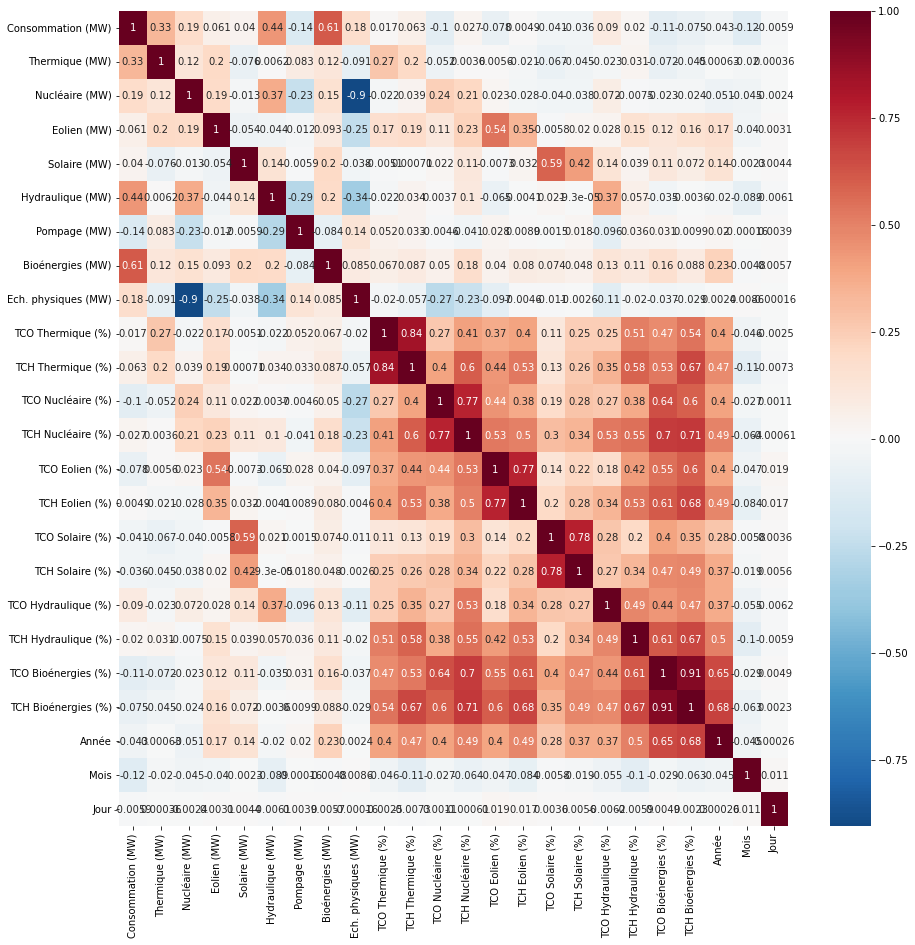

In [12]:
#On garde uniquement les valeurs numériques pour la corélation
df_numeric = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15,15))
sns.heatmap(df_numeric.corr(), annot=True, center=0, cmap='RdBu_r');

## 4) DataViz'

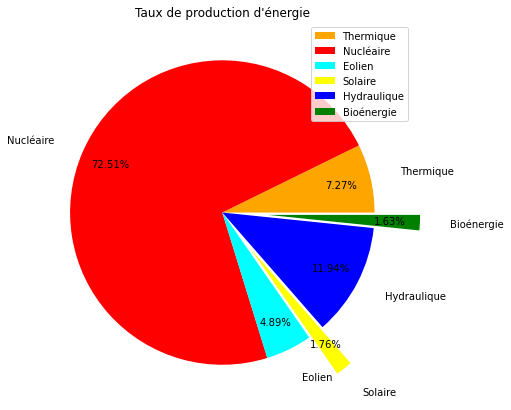

In [13]:
#Calcul des % des productions d'énergies
thermique = df['Thermique (MW)'].sum()
nucleaire = df['Nucléaire (MW)'].sum()
eolien = df['Eolien (MW)'].sum()
solaire = df['Solaire (MW)'].sum()
hydraulique = df['Hydraulique (MW)'].sum()
bioenergie = df['Bioénergies (MW)'].sum()

total = thermique + nucleaire + eolien + solaire + hydraulique + bioenergie

pct_thermique = thermique / total *100
pct_nucleaire = nucleaire / total *100
pct_eolien = eolien / total *100
pct_solaire = solaire / total *100
pct_hydraulique = hydraulique / total *100
pct_bioenergie = bioenergie / total *100

#Affichage de répartition de production d'énergie
plt.figure(figsize=(7,7))
plt.pie([pct_thermique, pct_nucleaire, pct_eolien, pct_solaire, pct_hydraulique, pct_bioenergie],
        colors=['orange', 'red', 'cyan', 'yellow', 'blue', 'green'],
        explode=[0, 0, 0, 0.3, 0, 0.3], 
        labels=['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergie'],
        labeldistance=1.2,
        autopct=lambda x : str(round(x,2))+'%', pctdistance=0.8,)

plt.legend()
plt.title("Taux de production d'énergie")
plt.show();

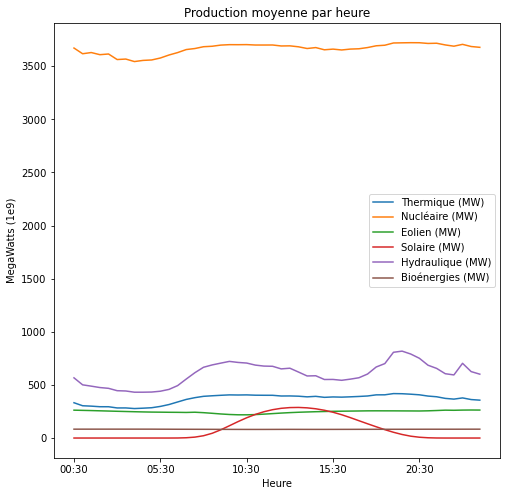

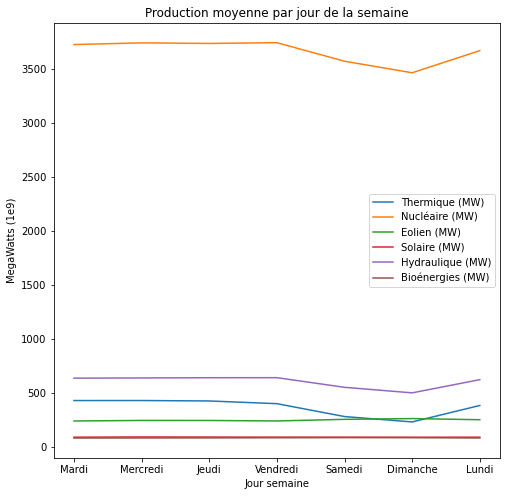

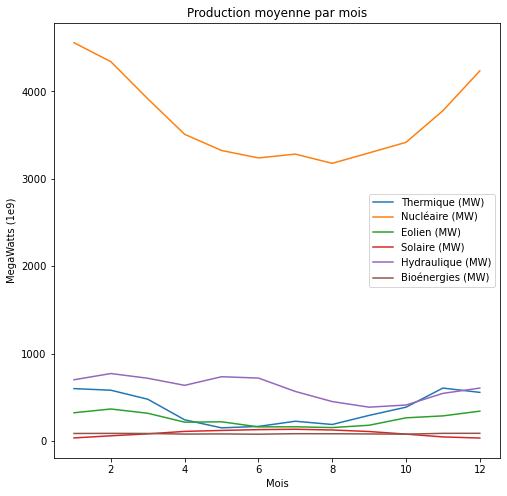

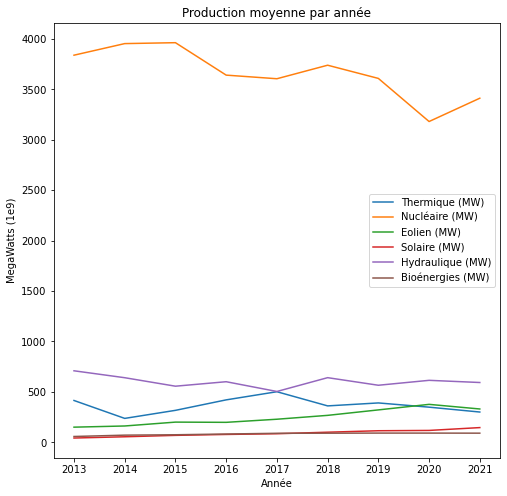

In [14]:
#Graphique de la production moyenne par heure
column_h = df[['Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Bioénergies (MW)',
               'Heure']].columns
df_h = df[column_h].groupby(pd.Grouper(key='Heure')).mean()
df_h.plot(ylabel='MegaWatts (1e9)', figsize=(8,8), title='Production moyenne par heure')

#Graphique de la production moyenne par Jour de la semaine
column_j = df[['Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Bioénergies (MW)',
               'Jour semaine']].columns
df_j = df[column_j].groupby(pd.Grouper(key='Jour semaine')).mean()
df_j.plot(ylabel='MegaWatts (1e9)', figsize=(8,8), title='Production moyenne par jour de la semaine')

#Graphique de la production moyenne par mois
column_m = df[['Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Bioénergies (MW)',
               'Mois']].columns
df_m = df[column_m].groupby(pd.Grouper(key='Mois')).mean()
df_m.plot(ylabel='MegaWatts (1e9)', figsize=(8,8), title='Production moyenne par mois')

#Graphique de la production moyenne par année
column_a = df[['Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Bioénergies (MW)',
               'Année']].columns
df_a = df[column_a].groupby(pd.Grouper(key='Année')).mean()
df_a.plot(ylabel='MegaWatts (1e9)', figsize=(8,8), title='Production moyenne par année');

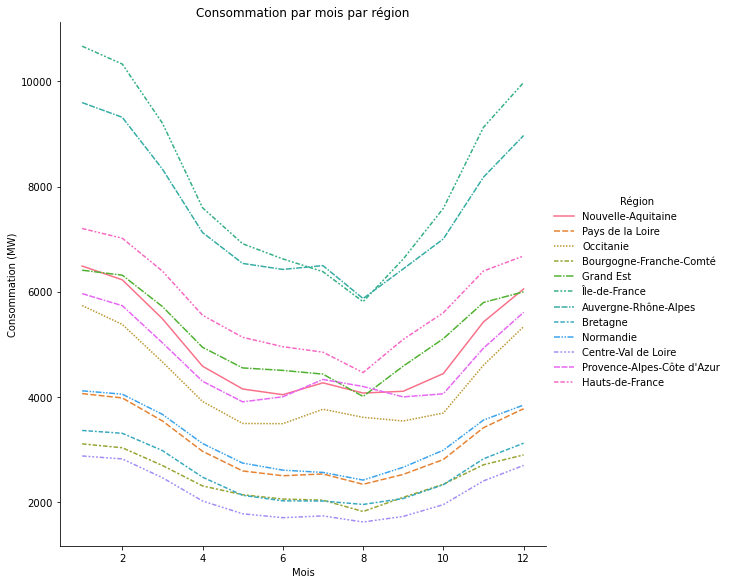

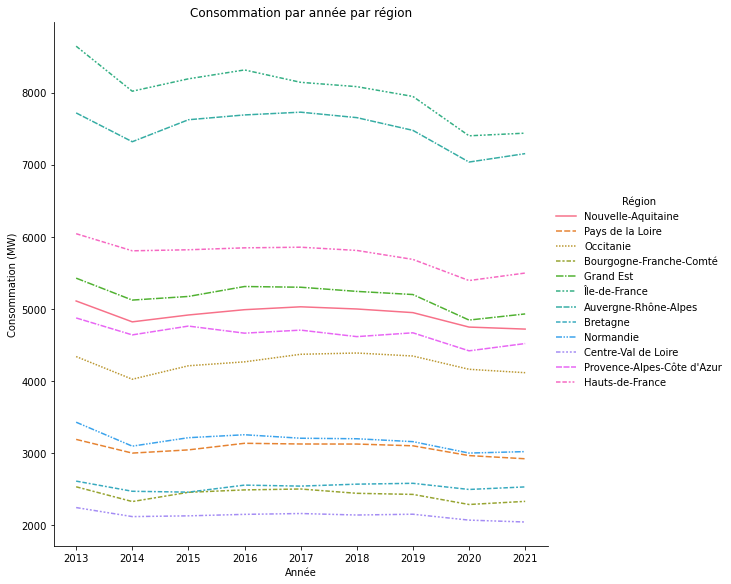

In [15]:
#Affichage de la consommation par mois et année
sns.relplot(x='Mois', y='Consommation (MW)', data=df, hue='Région', style='Région', kind='line', ci=None, height=8)
plt.xlabel('Mois')
plt.title('Consommation par mois par région');

sns.relplot(x='Année', y='Consommation (MW)', data=df, hue='Région', style='Région', kind='line', ci=None, height=8)
plt.xlabel('Année')
plt.title('Consommation par année par région');

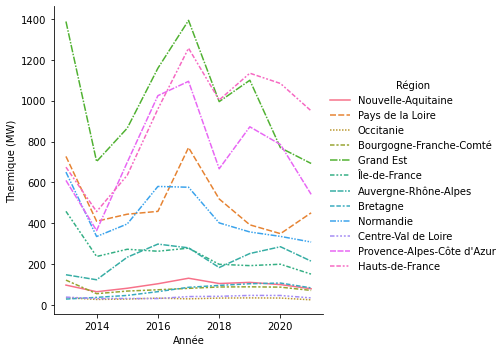

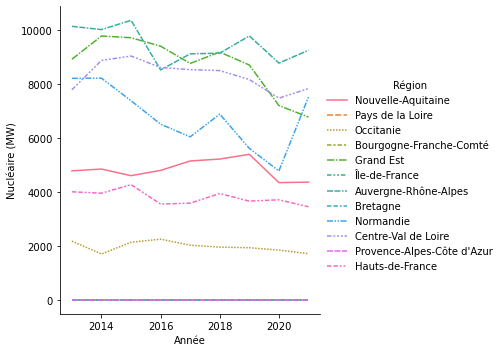

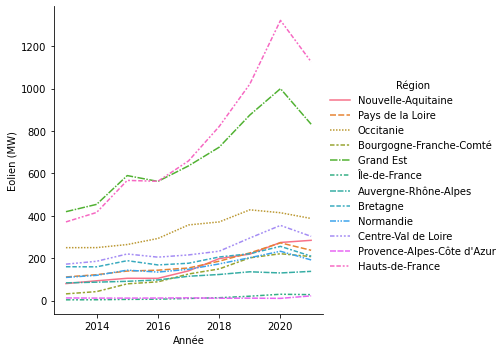

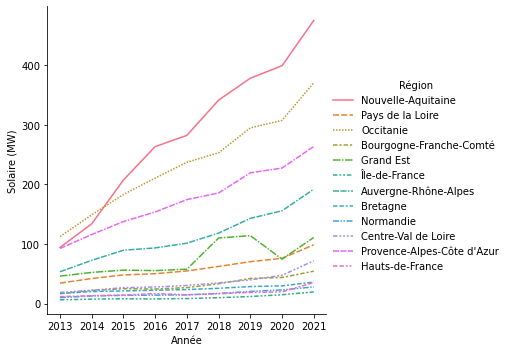

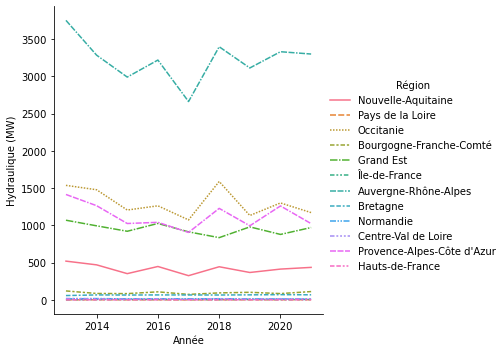

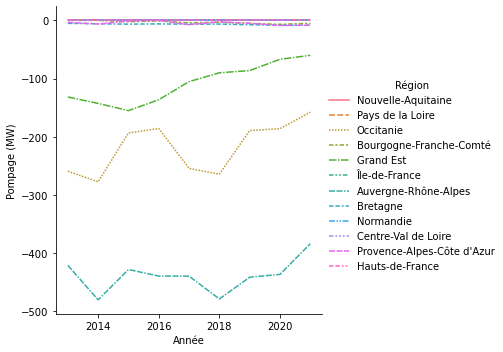

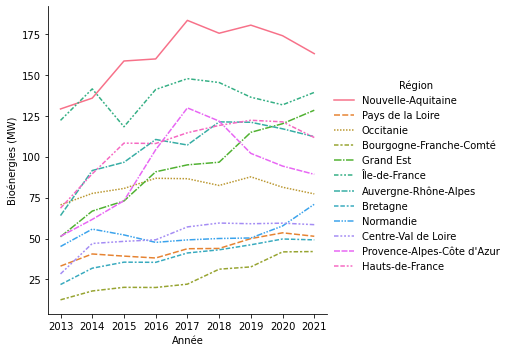

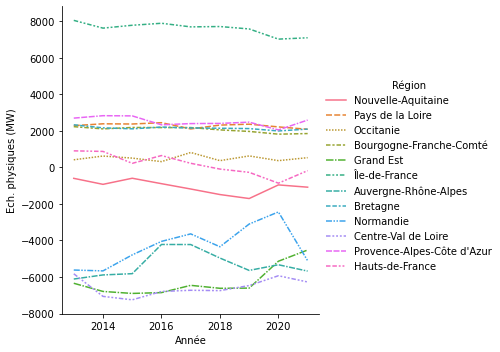

In [16]:
#Affichage des productions d'énergie par année
sns.relplot(x='Année', y='Thermique (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Année', y='Nucléaire (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Année', y='Eolien (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Année', y='Solaire (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Année', y='Hydraulique (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Année', y='Pompage (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Année', y='Bioénergies (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Année', y='Ech. physiques (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);

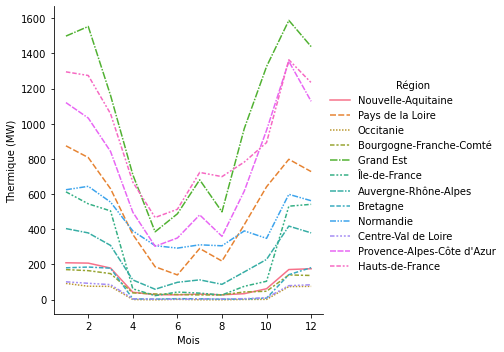

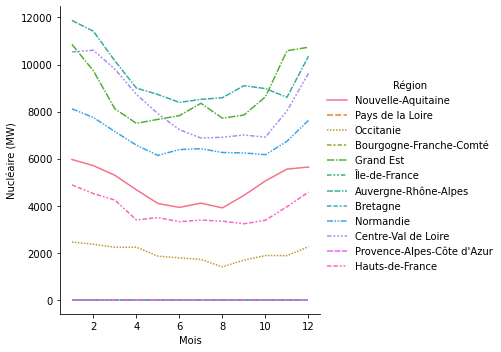

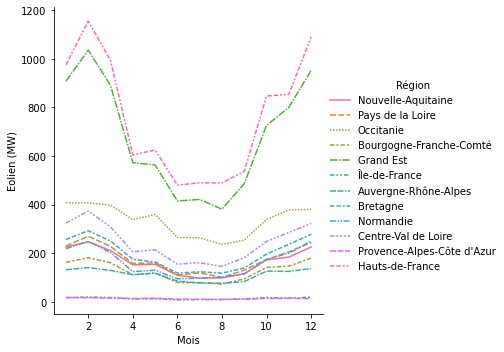

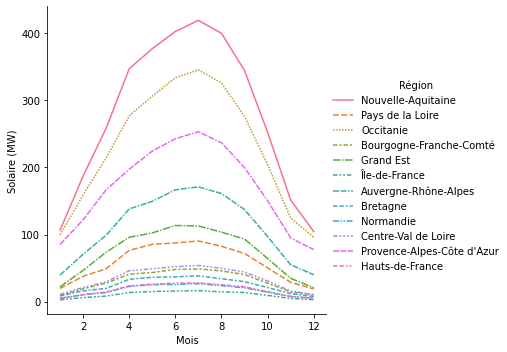

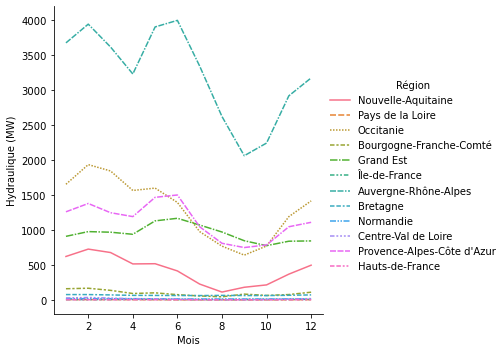

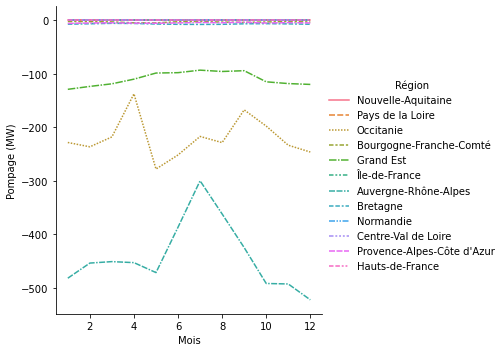

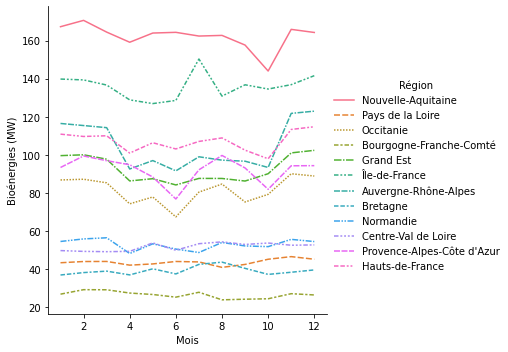

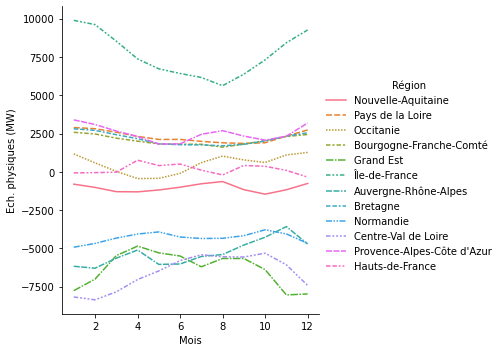

In [17]:
#Affichage des productions d'énergie par mois
sns.relplot(x='Mois', y='Thermique (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Mois', y='Nucléaire (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Mois', y='Eolien (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Mois', y='Solaire (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Mois', y='Hydraulique (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Mois', y='Pompage (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Mois', y='Bioénergies (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Mois', y='Ech. physiques (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);

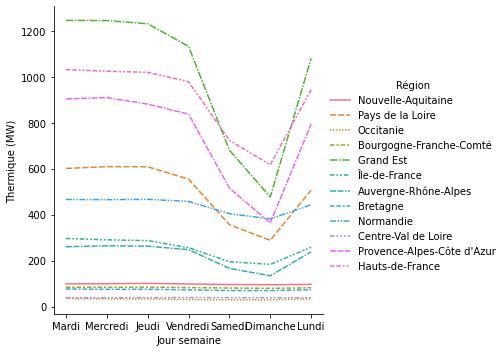

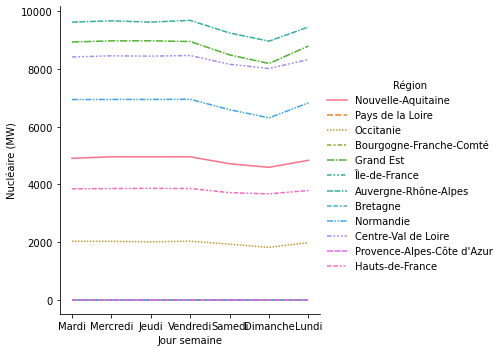

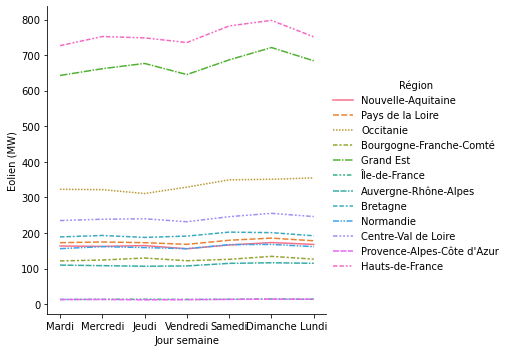

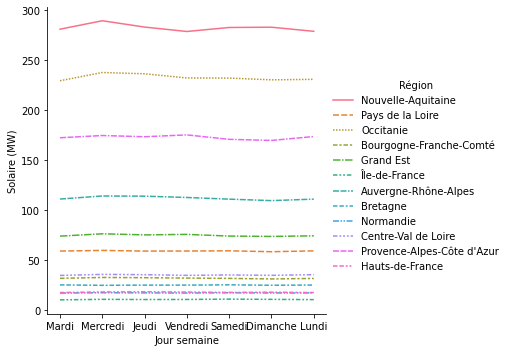

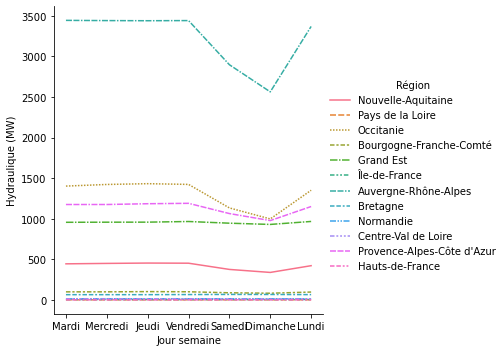

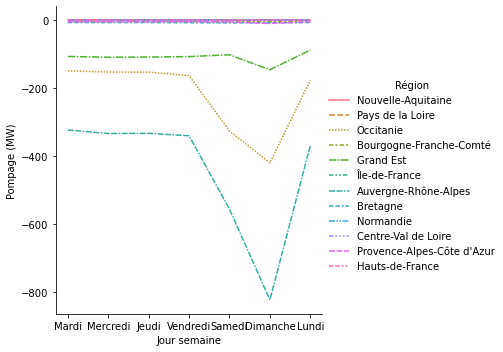

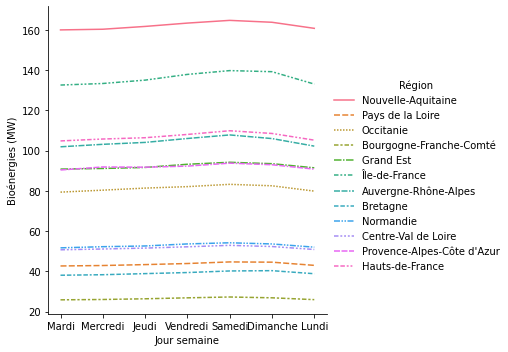

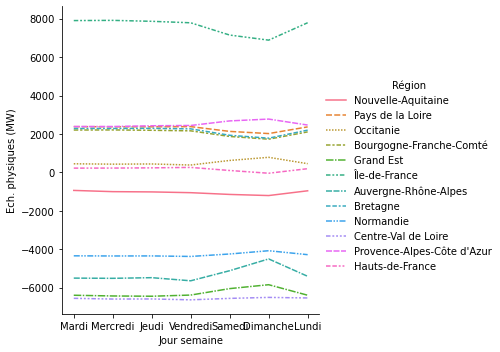

In [18]:
#Affichage des productions d'énergie par jour de la semaine
sns.relplot(x='Jour semaine', y='Thermique (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Jour semaine', y='Nucléaire (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Jour semaine', y='Eolien (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Jour semaine', y='Solaire (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Jour semaine', y='Hydraulique (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Jour semaine', y='Pompage (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Jour semaine', y='Bioénergies (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);
sns.relplot(x='Jour semaine', y='Ech. physiques (MW)', data=df, hue='Région', style='Région', kind='line', ci=None);

In [19]:
#Moyenne annuelle de Consommation (MW)
moy_conso = list()
for i in df['Année'].unique():
    moy_conso.append(df[df['Année']==i]['Consommation (MW)'].mean())

#Moyenne annuelle de Ech. physiques (MW)
moy_ech = list()
for i in df['Année'].unique():
    moy_ech.append(df[df['Année']==i]['Ech. physiques (MW)'].mean())

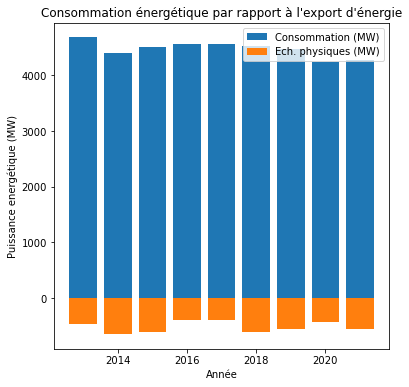

In [20]:
plt.figure(figsize=(6,6))

plt.bar(df['Année'].unique(), moy_conso, label='Consommation (MW)')
plt.bar(df['Année'].unique(), moy_ech, label='Ech. physiques (MW)')
plt.title("Consommation énergétique par rapport à l'export d'énergie")
plt.xlabel('Année')
plt.ylabel('Puissance energétique (MW)')
plt.legend();

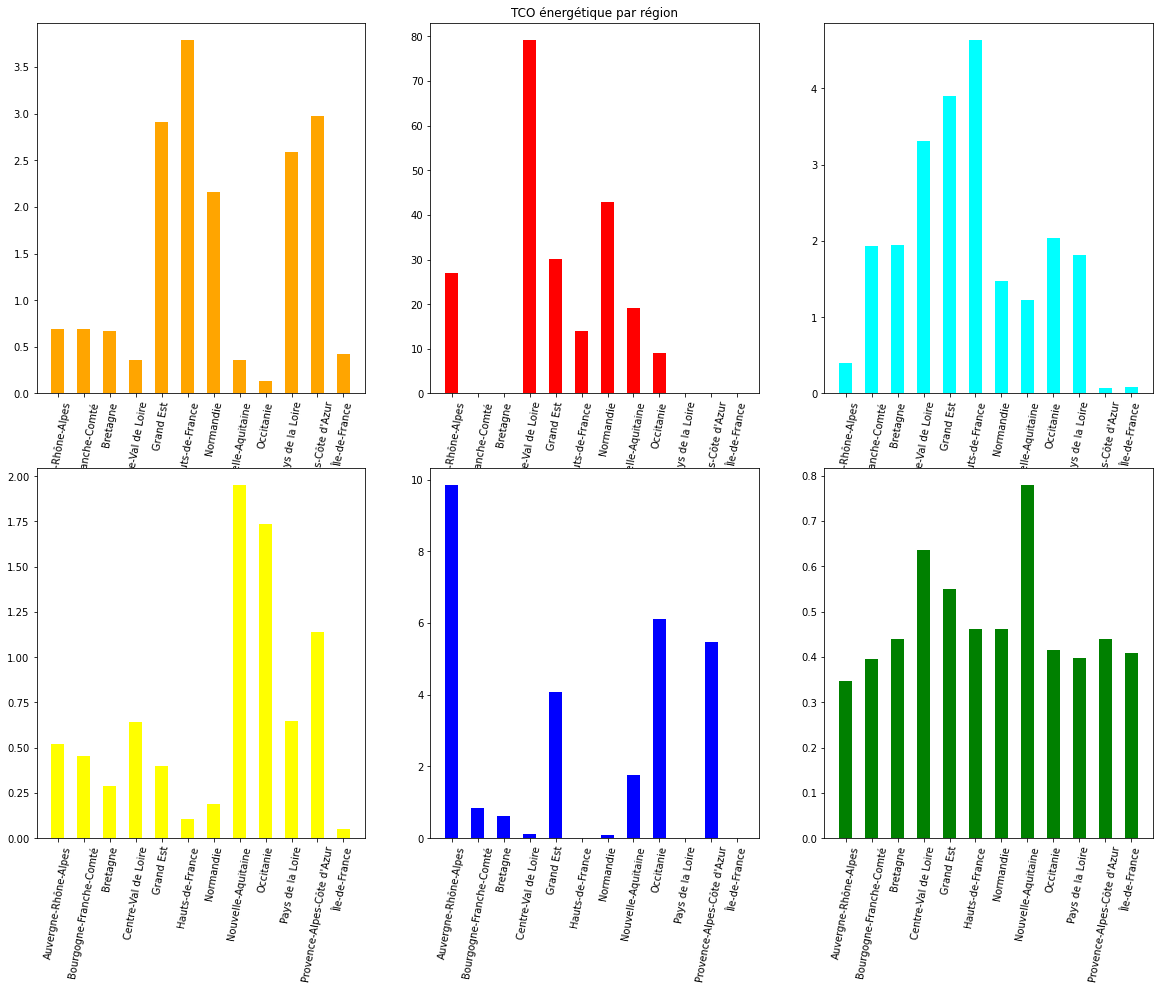

In [21]:
TCO_nucl = list()
TCO_therm = list()
TCO_eol = list()
TCO_sol = list()
TCO_hydrau = list()
TCO_bio = list()

#Regroupement de la moyenne TCO énergétique par région
TCO_nucl = df.groupby('Région')['TCO Nucléaire (%)'].mean()
TCO_therm = df.groupby('Région')['TCO Thermique (%)'].mean()
TCO_eol = df.groupby('Région')['TCO Eolien (%)'].mean()
TCO_sol = df.groupby('Région')['TCO Solaire (%)'].mean()
TCO_hydrau = df.groupby('Région')['TCO Hydraulique (%)'].mean()
TCO_bio = df.groupby('Région')['TCO Bioénergies (%)'].mean()

plt.figure(figsize=(20,15))

plt.subplot(231)
plt.bar(range(len(TCO_therm)), TCO_therm.values, width=0.5, label ='Thermique', color='orange')
plt.xticks(range(len(TCO_therm)), TCO_therm.index, rotation=80)

plt.subplot(232)
plt.bar(range(len(TCO_nucl)), TCO_nucl.values, width=0.5, label='Nucléaire', color='red')
plt.xticks(range(len(TCO_nucl)), TCO_nucl.index, rotation=80);
plt.title('TCO énergétique par région');

plt.subplot(233)
plt.bar(range(len(TCO_eol)), TCO_eol.values, width=0.5, label='Eolien', color='cyan')
plt.xticks(range(len(TCO_eol)), TCO_eol.index, rotation=80);

plt.subplot(234)
plt.bar(range(len(TCO_sol)), TCO_sol.values, width=0.5, label='Solaire', color='yellow')
plt.xticks(range(len(TCO_sol)), TCO_sol.index, rotation=80);

plt.subplot(235)
plt.bar(range(len(TCO_hydrau)), TCO_hydrau.values, width=0.5, label='Hydraulique', color='blue')
plt.xticks(range(len(TCO_hydrau)), TCO_hydrau.index, rotation=80);

plt.subplot(236)
plt.bar(range(len(TCO_bio)), TCO_bio.values, width=0.5, label = 'Bioénergies', color='green')
plt.xticks(range(len(TCO_bio)), TCO_bio.index, rotation=80);

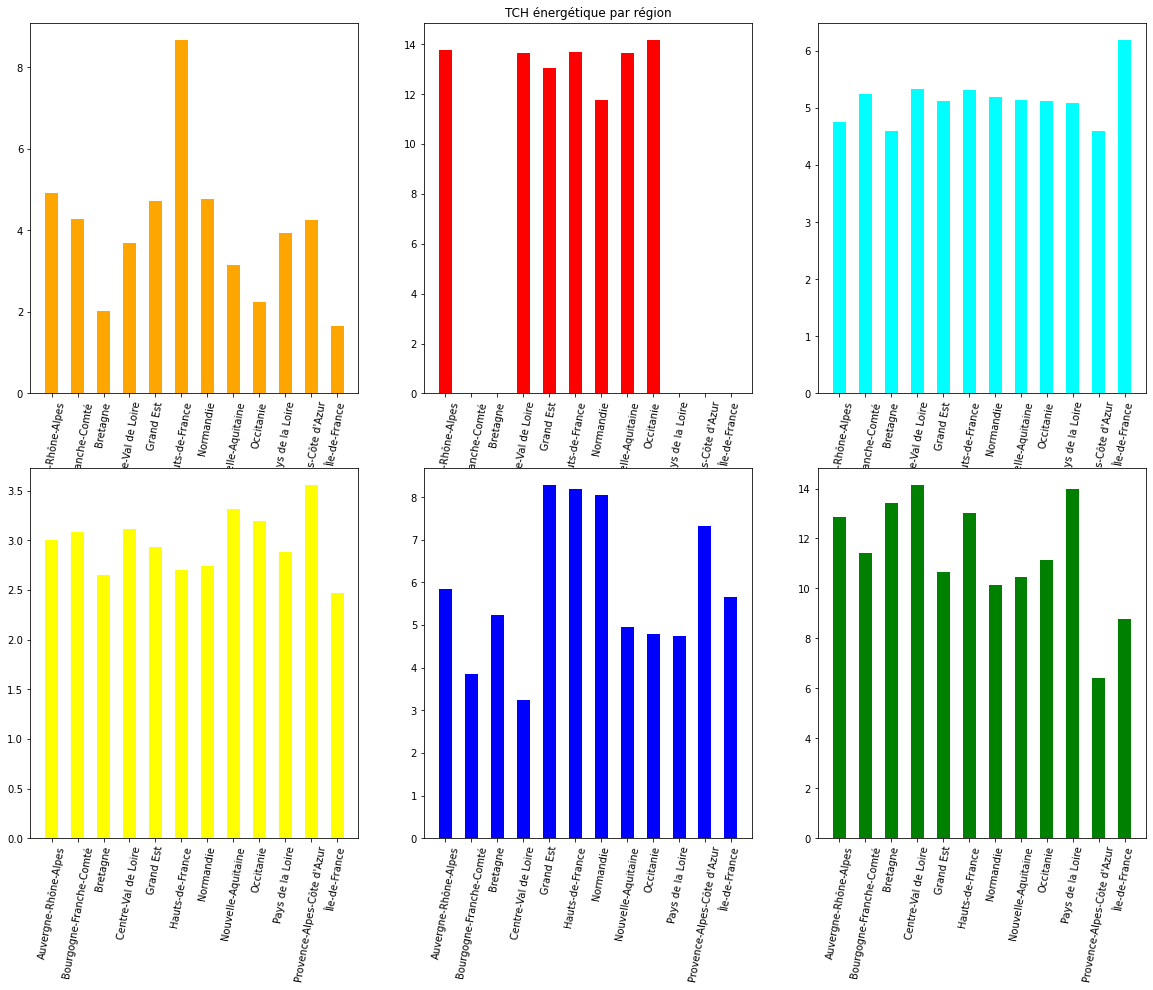

In [22]:
TCH_nucl = list()
TCH_therm = list()
TCH_eol = list()
TCH_sol = list()
TCH_hydrau = list()
TCH_bio = list()

#Regroupement de la moyenne TCH énergétique par région
TCH_nucl = df.groupby('Région')['TCH Nucléaire (%)'].mean()
TCH_therm = df.groupby('Région')['TCH Thermique (%)'].mean()
TCH_eol = df.groupby('Région')['TCH Eolien (%)'].mean()
TCH_sol = df.groupby('Région')['TCH Solaire (%)'].mean()
TCH_hydrau = df.groupby('Région')['TCH Hydraulique (%)'].mean()
TCH_bio = df.groupby('Région')['TCH Bioénergies (%)'].mean()

plt.figure(figsize=(20,15))

plt.subplot(231)
plt.bar(range(len(TCH_therm)), TCH_therm.values, width=0.5, label='Thermique', color='orange')
plt.xticks(range(len(TCH_therm)), TCH_therm.index, rotation=80);

plt.subplot(232)
plt.bar(range(len(TCH_nucl)), TCH_nucl.values, width=0.5, label='Nucléaire', color='red')
plt.xticks(range(len(TCH_nucl)), TCH_nucl.index, rotation=80);
plt.title('TCH énergétique par région');


plt.subplot(233)
plt.bar(range(len(TCH_eol)), TCH_eol.values, width=0.5, label='Eolien', color='cyan')
plt.xticks(range(len(TCH_eol)), TCH_eol.index, rotation=80);

plt.subplot(234)
plt.bar(range(len(TCH_sol)), TCH_sol.values, width=0.5, label='Solaire', color='yellow')
plt.xticks(range(len(TCH_sol)), TCH_sol.index, rotation=80);

plt.subplot(235)
plt.bar(range(len(TCH_hydrau)), TCH_hydrau.values, width=0.5, label='Hydraulique', color='blue')
plt.xticks(range(len(TCH_hydrau)), TCH_hydrau.index, rotation=80);

plt.subplot(236)
plt.bar(range(len(TCH_bio)), TCH_bio.values, width=0.5, label='Bioénergies', color='green')
plt.xticks(range(len(TCH_bio)), TCH_bio.index, rotation=80);

# 5) Modélisation

## Régression sans sélection des variables

### Régression linéaire multiple

In [23]:
#Copie du dataframe pour garder le dataframe originel intact
df1 = df.copy()

#Supprission des variables non essentielles au modèle
df1.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On supprime également la variable Ech. Physiques qui n'est pas une production d'énergie à proprement parler
df1.drop('Ech. physiques (MW)', axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df1.index = df1['Région']
df1.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df1.drop('Année', axis=1)

#Standardisation en gardant le nom des colonnes et l'index
scaler = StandardScaler().fit(dfa)
df_scale = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df1['Consommation (MW)']
data = df1.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modème
lr = LinearRegression()

#Entraînement et prédiction du modèle
lr.fit(X_train, y_train)

lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

#Calcul et affichage des scores
Rl_train_score1 = lr.score(X_train, y_train)
Rl_test_score1 = lr.score(X_test, y_test)
Rl_train_rmse1 = np.sqrt(mean_squared_error(y_train, lr_pred_train))
Rl_test_rmse1 = np.sqrt(mean_squared_error(y_test, lr_pred_test))

print('Les performances de la regréssion lineaire :\n',
     'Score train :', Rl_train_score1, '\n',
     'Score test :', Rl_test_score1, '\n',
     'RMSE train :', Rl_train_rmse1, '\n',
     'RMSE test :', Rl_test_rmse1)

Les performances de la regréssion lineaire :
 Score train : 0.625098576226315 
 Score test : 0.6265522490458546 
 RMSE train : 1322.313589171613 
 RMSE test : 1323.0370453839998


### Régression Lasso par validation croisée

In [24]:
#Copie du dataframe pour garder le dataframe originel intact
df2 = df.copy()

#Supprission des variables non essentielles au modèle
df2.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df2.index = df2['Région']
df2.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df2.drop('Année', axis=1)

#Standardisation en gardant le nom des colonnes et l'index
scaler = StandardScaler().fit(dfa)
df_scale = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df2['Consommation (MW)']
data = df2.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
lasso = LassoCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

#Entraînement et prédiction du modèle
lasso.fit(X_train, y_train) 

lasso_pred_train = lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test)

#Calcul et affichage des scores
lasso_train_score1 = lasso.score(X_train, y_train)
lasso_test_score1 = lasso.score(X_test, y_test)
lasso_train_rmse1 = np.sqrt(mean_squared_error(y_train, lasso_pred_train))
lasso_test_rmse1 = np.sqrt(mean_squared_error(y_test, lasso_pred_test))

print('Les performances du modèle LassoCV :\n',
     'Score train :', lasso_train_score1, '\n',
     'Score test :', lasso_test_score1, '\n',
     'RMSE train :', lasso_train_rmse1, '\n',
     'RMSE test :', lasso_test_rmse1)

Les performances du modèle LassoCV :
 Score train : 0.9999925987126974 
 Score test : 0.9999935474162088 
 RMSE train : 5.875293243932609 
 RMSE test : 5.499508871980404


### Régression Ridge par validation croisée

In [25]:
#Copie du dataframe pour garder le dataframe originel intact
df3 = df.copy()

#Supprission des variables non essentielles au modèle
df3.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df3.index = df3['Région']
df3.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df3.drop('Année', axis=1)

#Standardisation en gardant le nom des colonnes et l'index
scaler = StandardScaler().fit(dfa)
df_scale = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df3['Consommation (MW)']
data = df3.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
ridge = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

#Entraînement et prédiction du modèle
ridge.fit(X_train, y_train) 

ridge_pred_train = ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test)

#Calcul et affichage des scores
ridge_train_score1 = ridge.score(X_train, y_train)
ridge_test_score1 = ridge.score(X_test, y_test)
ridge_train_rmse1 = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_test_rmse1 = np.sqrt(mean_squared_error(y_test, ridge_pred_test))

print('Les performances du modèle RidgeCV :\n',
     'Score train :', ridge_train_score1, '\n',
     'Score test :', ridge_test_score1, '\n',
     'RMSE train :', ridge_train_rmse1, '\n',
     'RMSE test :', ridge_test_rmse1)

Les performances du modèle RidgeCV :
 Score train : 0.9999917135225695 
 Score test : 0.9999926736407082 
 RMSE train : 6.216714057998858 
 RMSE test : 5.860048185414856


### Régression ElasticNet par validation croisée

In [26]:
#Copie du dataframe pour garder le dataframe originel intact
df4 = df.copy()

#Supprission des variables non essentielles au modèle
df4.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df4.index = df4['Région']
df4.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df4.drop('Année', axis=1)

#Standardisation en gardant le nom des colonnes et l'index
scaler = StandardScaler().fit(dfa)
df_scale = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df4['Consommation (MW)']
data = df4.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
elastic = ElasticNetCV(l1_ratio=[0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99],
                       alphas=[0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0])

#Entraînement et prédiction du modèle
elastic.fit(X_train, y_train) 

elastic_pred_train = elastic.predict(X_train)
elastic_pred_test = elastic.predict(X_test)

#Calcul et affichage des scores
elastic_train_score1 = elastic.score(X_train, y_train)
elastic_test_score1 = elastic.score(X_test, y_test)
elastic_train_rmse1 = np.sqrt(mean_squared_error(y_train, elastic_pred_train))
elastic_test_rmse1 = np.sqrt(mean_squared_error(y_test, elastic_pred_test))

print('Les performances du modèle ElasticNetCV :\n',
     'Score train :', elastic_train_score1, '\n',
     'Score test :', elastic_test_score1, '\n',
     'RMSE train :', elastic_train_rmse1, '\n',
     'RMSE test :', elastic_test_rmse1)

Les performances du modèle ElasticNetCV :
 Score train : 0.9999925987154067 
 Score test : 0.9999935474081925 
 RMSE train : 5.875292168571981 
 RMSE test : 5.4995122881086305


In [27]:
lst_rl = [Rl_train_score1, Rl_test_score1, Rl_train_rmse1, Rl_test_rmse1]
lst_lasso = [lasso_train_score1, lasso_test_score1, lasso_train_rmse1, lasso_test_rmse1]
lst_ridge = [ridge_train_score1, ridge_test_score1, ridge_train_rmse1, ridge_test_rmse1]
lst_elastic = [elastic_train_score1, elastic_test_score1, elastic_train_rmse1, elastic_test_rmse1]
lst_type = ['Score train', 'Score test', 'RMSE train', 'RMSE test']
df_sm = pd.DataFrame(list(zip(lst_rl, lst_lasso, lst_ridge, lst_elastic, lst_type)), columns=['R. Linéaire', 'LassoCV', 'RidgeCV', 'ElasticNetCV', 'Type'])
df_sm.set_index('Type', inplace = True)
print(df_sm)

             R. Linéaire   LassoCV   RidgeCV  ElasticNetCV
Type                                                      
Score train     0.625099  0.999993  0.999992      0.999993
Score test      0.626552  0.999994  0.999993      0.999994
RMSE train   1322.313589  5.875293  6.216714      5.875292
RMSE test    1323.037045  5.499509  5.860048      5.499512


## Régression avec sélection des variables (SelectFromModel)

### Régression linéaire multiple

In [28]:
#Copie du dataframe pour garder le dataframe originel intact
df1 = df.copy()

#Supprission des variables non essentielles au modèle
df1.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df1.index = df1['Région']
df1.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df1.drop('Année', axis=1)

#On définit les ensembles d'entraînement et de test
target = dfa['Consommation (MW)']
data = dfa.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modème et sélection des variables
lr = LinearRegression()
sfm = SelectFromModel(lr)

#Standardisation et transformation
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sfm_train = sfm.fit_transform(X_train_scaled, y_train)
sfm_test = sfm.transform(X_test_scaled)

print('Les meilleurs variables sont :\n', data.columns[sfm.get_support()],'\n')

sfmlr = LinearRegression()

#Entraînement et prédiction du modèle
sfmlr.fit(sfm_train, y_train)

sfmlr_pred_train = sfmlr.predict(sfm_train)
sfmlr_pred_test = sfmlr.predict(sfm_test)

#Calcul et affichage des scores
Rl_train_score2 = sfmlr.score(sfm_train, y_train)
Rl_test_score2 = sfmlr.score(sfm_test, y_test)
Rl_train_rmse2 = np.sqrt(mean_squared_error(y_train, sfmlr_pred_train))
Rl_test_rmse2 = np.sqrt(mean_squared_error(y_test, sfmlr_pred_test))

print('Les performances de la regréssion lineaire :\n',
     'Score test :', Rl_train_score2, '\n',
     'Score train :', Rl_test_score2, '\n',
     'RMSE train :', Rl_train_rmse2, '\n',
     'RMSE test :', Rl_test_rmse2)

Les meilleurs variables sont :
 Index(['Nucléaire (MW)', 'Hydraulique (MW)', 'Ech. physiques (MW)'], dtype='object') 

Les performances de la regréssion lineaire :
 Score test : 0.8652453087248416 
 Score train : 0.8664179141067424 
 RMSE train : 792.7711969863994 
 RMSE test : 791.28182577176


In [29]:
#On récupère les variables sélectionnées
signif_features =['Nucléaire (MW)', 'Hydraulique (MW)', 'Ech. physiques (MW)']

### Régression Lasso par validation croisée

In [30]:
#Copie du dataframe pour garder le dataframe originel intact
df2 = df.copy()

#Supprission des variables non essentielles au modèle
df2.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df2.index = df2['Région']
df2.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df2.drop('Année', axis=1)

scaler = StandardScaler().fit(dfa)

#Standardisation en gardant le nom des colonnes et l'index
df_stand = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df_stand['Consommation (MW)']
data = df_stand.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
lasso = LassoCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

#Entraînement et prédiction du modèle
lasso.fit(X_train[signif_features], y_train) 

lasso_pred_train = lasso.predict(X_train[signif_features])
lasso_pred_test = lasso.predict(X_test[signif_features])

#Calcul et affichage des scores
lasso_train_score2 = lasso.score(X_train[signif_features], y_train)
lasso_test_score2 = lasso.score(X_test[signif_features], y_test)
lasso_train_rmse2 = np.sqrt(mean_squared_error(y_train, lasso_pred_train))
lasso_test_rmse2 = np.sqrt(mean_squared_error(y_test, lasso_pred_test))

print('Les performances du modèle LassoCV :\n',
     'Score test :', lasso_train_score2, '\n',
     'Score train :', lasso_test_score2, '\n',
     'RMSE train :', lasso_train_rmse2, '\n',
     'RMSE test :', lasso_test_rmse2)

Les performances du modèle LassoCV :
 Score test : 0.8652233283300496 
 Score train : 0.8663860299747074 
 RMSE train : 0.36693618319229054 
 RMSE test : 0.36626066030549725


### Régression Ridge par validation croisée

In [31]:
#Copie du dataframe pour garder le dataframe originel intact
df3 = df.copy()

#Supprission des variables non essentielles au modèle
df3.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df3.index = df3['Région']
df3.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df3.drop('Année', axis=1)

scaler = StandardScaler().fit(dfa)

#Standardisation en gardant le nom des colonnes et l'index
df_stand = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df_stand['Consommation (MW)']
data = df_stand.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
ridge = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

#Entraînement et prédiction du modèle
ridge.fit(X_train[signif_features], y_train) 

ridge_pred_train = ridge.predict(X_train[signif_features])
ridge_pred_test = ridge.predict(X_test[signif_features])

#Calcul et affichage des scores
ridge_train_score2 = ridge.score(X_train[signif_features], y_train)
ridge_test_score2 = ridge.score(X_test[signif_features], y_test)
ridge_train_rmse2 = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_test_rmse2 = np.sqrt(mean_squared_error(y_test, ridge_pred_test))

print('Les performances du modèle RidgeCV :\n',
     'Score test :', ridge_train_score2, '\n',
     'Score train :', ridge_test_score2, '\n',
     'RMSE train :', ridge_train_rmse2, '\n',
     'RMSE test :', ridge_test_rmse2)

Les performances du modèle RidgeCV :
 Score test : 0.8652452830565125 
 Score train : 0.8664177328479877 
 RMSE train : 0.36690629555842824 
 RMSE test : 0.366217206001456


### Régression ElasticNet par validation croisée

In [32]:
#Copie du dataframe pour garder le dataframe originel intact
df4 = df.copy()

#Supprission des variables non essentielles au modèle
df4.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df4.index = df4['Région']
df4.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df4.drop('Année', axis=1)

scaler = StandardScaler().fit(dfa)

#Standardisation en gardant le nom des colonnes et l'index
df_stand = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df_stand['Consommation (MW)']
data = df_stand.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
elastic = ElasticNetCV(l1_ratio=[0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99],
                       alphas=[0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0])

#Entraînement et prédiction du modèle
elastic.fit(X_train[signif_features], y_train) 

elastic_pred_train = elastic.predict(X_train[signif_features])
elastic_pred_test = elastic.predict(X_test[signif_features])

#Calcul et affichage des scores
elastic_train_score2 = elastic.score(X_train[signif_features], y_train)
elastic_test_score2 = elastic.score(X_test[signif_features], y_test)
elastic_train_rmse2 = np.sqrt(mean_squared_error(y_train, elastic_pred_train))
elastic_test_rmse2 = np.sqrt(mean_squared_error(y_test, elastic_pred_test))

print('Les performances du modèle ElasticNet :\n',
     'Score test :', elastic_train_score2, '\n',
     'Score train :', elastic_test_score2, '\n',
     'RMSE train :', elastic_train_rmse2, '\n',
     'RMSE test :', elastic_test_rmse2)

Les performances du modèle ElasticNet :
 Score test : 0.865222986137274 
 Score train : 0.8663855985187917 
 RMSE train : 0.36693664901040923 
 RMSE test : 0.3662612516553425


In [33]:
lst_rl = [Rl_train_score2, Rl_test_score2, Rl_train_rmse2, Rl_test_rmse2]
lst_lasso = [lasso_train_score2, lasso_test_score2, lasso_train_rmse2, lasso_test_rmse2]
lst_ridge = [ridge_train_score2, ridge_test_score2, ridge_train_rmse2, ridge_test_rmse2]
lst_elastic = [elastic_train_score2, elastic_test_score2, elastic_train_rmse2, elastic_test_rmse2]
lst_type = ['Score train', 'Score test', 'RMSE train', 'RMSE test']
df_am = pd.DataFrame(list(zip(lst_rl, lst_lasso, lst_ridge, lst_elastic, lst_type)), columns=['R. Linéaire', 'LassoCV', 'RidgeCV', 'ElasticNetCV', 'Type'])
df_am.set_index('Type', inplace = True)
print(df_am)

             R. Linéaire   LassoCV   RidgeCV  ElasticNetCV
Type                                                      
Score train     0.865245  0.865223  0.865245      0.865223
Score test      0.866418  0.866386  0.866418      0.866386
RMSE train    792.771197  0.366936  0.366906      0.366937
RMSE test     791.281826  0.366261  0.366217      0.366261


## Régression avec les variables énergies renouvelables

In [34]:
#On récupère les variables énergies renouvelables
ener_renouv = ['Eolien (MW)','Solaire (MW)', 'Bioénergies (MW)', 'Hydraulique (MW)']

### Régression linéaire multiple

In [35]:
#Copie du dataframe pour garder le dataframe originel intact
df1 = df.copy()

#Supprission des variables non essentielles au modèle
df1.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df1.index = df1['Région']
df1.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df1.drop('Année', axis=1)

#Standardisation en gardant le nom des colonnes et l'index
scaler = StandardScaler().fit(dfa)
df_scale = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df1['Consommation (MW)']
data = df1.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modème
lr = LinearRegression()

#Entraînement et prédiction du modèle
lr.fit(X_train[ener_renouv], y_train)

lr_pred_train = lr.predict(X_train[ener_renouv])
lr_pred_test = lr.predict(X_test[ener_renouv])

#Calcul et affichage des scores
Rl_train_score3 = lr.score(X_train[ener_renouv], y_train)
Rl_test_score3 = lr.score(X_test[ener_renouv], y_test)
Rl_train_rmse3 = np.sqrt(mean_squared_error(y_train, lr_pred_train))
Rl_test_rmse3 = np.sqrt(mean_squared_error(y_test, lr_pred_test))

print('Les performances de la regréssion lineaire :\n',
     'Score train :', Rl_train_score3, '\n',
     'Score test :', Rl_test_score3, '\n',
     'RMSE train :', Rl_train_rmse3, '\n',
     'RMSE test :', Rl_test_rmse3)

Les performances de la regréssion lineaire :
 Score train : 0.4939627774956912 
 Score test : 0.49453919555972914 
 RMSE train : 1536.26857834158 
 RMSE test : 1539.2204426613478


### Régression Lasso par validation croisée

In [36]:
#Copie du dataframe pour garder le dataframe originel intact
df2 = df.copy()

#Supprission des variables non essentielles au modèle
df2.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df2.index = df2['Région']
df2.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df2.drop('Année', axis=1)

scaler = StandardScaler().fit(dfa)

#Standardisation en gardant le nom des colonnes et l'index
df_stand = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df_stand['Consommation (MW)']
data = df_stand.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
lasso = LassoCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

#Entraînement et prédiction du modèle
lasso.fit(X_train[ener_renouv], y_train) 

lasso_pred_train = lasso.predict(X_train[ener_renouv])
lasso_pred_test = lasso.predict(X_test[ener_renouv])

#Calcul et affichage des scores
lasso_train_score3 = lasso.score(X_train[ener_renouv], y_train)
lasso_test_score3 = lasso.score(X_test[ener_renouv], y_test)
lasso_train_rmse3 = np.sqrt(mean_squared_error(y_train, lasso_pred_train))
lasso_test_rmse3 = np.sqrt(mean_squared_error(y_test, lasso_pred_test))

print('Les performances du modèle LassoCV :\n',
     'Score test :', lasso_train_score3, '\n',
     'Score train :', lasso_test_score3, '\n',
     'RMSE train :', lasso_train_rmse3, '\n',
     'RMSE test :', lasso_test_rmse3)

Les performances du modèle LassoCV :
 Score test : 0.49395860216398313 
 Score train : 0.4945377148611263 
 RMSE train : 0.7110108022751512 
 RMSE test : 0.7123750789803247


### Régression Ridge par validation croisée

In [37]:
#Copie du dataframe pour garder le dataframe originel intact
df3 = df.copy()

#Supprission des variables non essentielles au modèle
df3.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df3.index = df3['Région']
df3.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df3.drop('Année', axis=1)

scaler = StandardScaler().fit(dfa)

#Standardisation en gardant le nom des colonnes et l'index
df_stand = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df_stand['Consommation (MW)']
data = df_stand.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
ridge = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

#Entraînement et prédiction du modèle
ridge.fit(X_train[ener_renouv], y_train) 

ridge_pred_train = ridge.predict(X_train[ener_renouv])
ridge_pred_test = ridge.predict(X_test[ener_renouv])

#Calcul et affichage des scores
ridge_train_score3 = ridge.score(X_train[ener_renouv], y_train)
ridge_test_score3 = ridge.score(X_test[ener_renouv], y_test)
ridge_train_rmse3 = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_test_rmse3 = np.sqrt(mean_squared_error(y_test, ridge_pred_test))

print('Les performances du modèle RidgeCV :\n',
     'Score test :', ridge_train_score3, '\n',
     'Score train :', ridge_test_score3, '\n',
     'RMSE train :', ridge_train_rmse3, '\n',
     'RMSE test :', ridge_test_rmse3)

Les performances du modèle RidgeCV :
 Score test : 0.4939627774754165 
 Score train : 0.494539186903863 
 RMSE train : 0.7110078690194253 
 RMSE test : 0.7123740416652221


### Régression ElasticNet par validation croisée

In [38]:
#Copie du dataframe pour garder le dataframe originel intact
df4 = df.copy()

#Supprission des variables non essentielles au modèle
df4.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df4.index = df4['Région']
df4.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df4.drop('Année', axis=1)

scaler = StandardScaler().fit(dfa)

#Standardisation en gardant le nom des colonnes et l'index
df_stand = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df_stand['Consommation (MW)']
data = df_stand.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
elastic = ElasticNetCV(l1_ratio=[0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99],
                       alphas=[0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0])

#Entraînement et prédiction du modèle
elastic.fit(X_train[ener_renouv], y_train) 

elastic_pred_train = elastic.predict(X_train[ener_renouv])
elastic_pred_test = elastic.predict(X_test[ener_renouv])

#Calcul et affichage des scores
elastic_train_score3 = elastic.score(X_train[ener_renouv], y_train)
elastic_test_score3 = elastic.score(X_test[ener_renouv], y_test)
elastic_train_rmse3 = np.sqrt(mean_squared_error(y_train, elastic_pred_train))
elastic_test_rmse3 = np.sqrt(mean_squared_error(y_test, elastic_pred_test))

print('Les performances du modèle ElasticNet :\n',
     'Score test :', elastic_train_score3, '\n',
     'Score train :', elastic_test_score3, '\n',
     'RMSE train :', elastic_train_rmse3, '\n',
     'RMSE test :', elastic_test_rmse3)

Les performances du modèle ElasticNet :
 Score test : 0.4939621803207316 
 Score train : 0.49453771300004734 
 RMSE train : 0.7110082885355555 
 RMSE test : 0.7123750802917838


In [39]:
lst_rl = [Rl_train_score3, Rl_test_score3, Rl_train_rmse3, Rl_test_rmse3]
lst_lasso = [lasso_train_score3, lasso_test_score3, lasso_train_rmse3, lasso_test_rmse3]
lst_ridge = [ridge_train_score3, ridge_test_score3, ridge_train_rmse3, ridge_test_rmse3]
lst_elastic = [elastic_train_score3, elastic_test_score3, elastic_train_rmse3, elastic_test_rmse3]
lst_type = ['Score train', 'Score test', 'RMSE train', 'RMSE test']
df_er = pd.DataFrame(list(zip(lst_rl, lst_lasso, lst_ridge, lst_elastic, lst_type)), columns=['R. Linéaire', 'LassoCV', 'RidgeCV', 'ElasticNetCV', 'Type'])
df_er.set_index('Type', inplace = True)
print(df_er)

             R. Linéaire   LassoCV   RidgeCV  ElasticNetCV
Type                                                      
Score train     0.493963  0.493959  0.493963      0.493962
Score test      0.494539  0.494538  0.494539      0.494538
RMSE train   1536.268578  0.711011  0.711008      0.711008
RMSE test    1539.220443  0.712375  0.712374      0.712375


## Régression avec les variables perso

In [40]:
#On récupère les variables que l'on souhaite pour la modélisation
energ_perso = ['Thermique (MW)', 'Nucléaire (MW)', 'Hydraulique (MW)', 'Ech. physiques (MW)']

### Régression lineaire multiple

In [41]:
#Copie du dataframe pour garder le dataframe originel intact
df1 = df.copy()

#Supprission des variables non essentielles au modèle
df1.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df1.index = df1['Région']
df1.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df1.drop('Année', axis=1)

#Standardisation en gardant le nom des colonnes et l'index
scaler = StandardScaler().fit(dfa)
df_scale = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df1['Consommation (MW)']
data = df1.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modème
lr = LinearRegression()

#Entraînement et prédiction du modèle
lr.fit(X_train[energ_perso], y_train)

lr_pred_train = lr.predict(X_train[energ_perso])
lr_pred_test = lr.predict(X_test[energ_perso])

#Calcul et affichage des scores
Rl_train_score4 = lr.score(X_train[energ_perso], y_train)
Rl_test_score4 = lr.score(X_test[energ_perso], y_test)
Rl_train_rmse4 = np.sqrt(mean_squared_error(y_train, lr_pred_train))
Rl_test_rmse4 = np.sqrt(mean_squared_error(y_test, lr_pred_test))

print('Les performances de la regréssion lineaire :\n',
     'Score train :', Rl_train_score4, '\n',
     'Score test :', Rl_test_score4, '\n',
     'RMSE train :', Rl_train_rmse4, '\n',
     'RMSE test :', Rl_test_rmse4)

Les performances de la regréssion lineaire :
 Score train : 0.9473072297560431 
 Score test : 0.9479778010067589 
 RMSE train : 495.7371115841779 
 RMSE test : 493.8003956522493


### Régression Lasso par validation croisée

In [42]:
#Copie du dataframe pour garder le dataframe originel intact
df2 = df.copy()

#Supprission des variables non essentielles au modèle
df2.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df2.index = df2['Région']
df2.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df2.drop('Année', axis=1)

scaler = StandardScaler().fit(dfa)

#Standardisation en gardant le nom des colonnes et l'index
df_stand = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df_stand['Consommation (MW)']
data = df_stand.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
lasso = LassoCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

#Entraînement et prédiction du modèle
lasso.fit(X_train[energ_perso], y_train) 

lasso_pred_train = lasso.predict(X_train[energ_perso])
lasso_pred_test = lasso.predict(X_test[energ_perso])

#Calcul et affichage des scores
lasso_train_score4 = lasso.score(X_train[energ_perso], y_train)
lasso_test_score4 = lasso.score(X_test[energ_perso], y_test)
lasso_train_rmse4 = np.sqrt(mean_squared_error(y_train, lasso_pred_train))
lasso_test_rmse4 = np.sqrt(mean_squared_error(y_test, lasso_pred_test))

print('Les performances du modèle LassoCV :\n',
     'Score test :', lasso_train_score4, '\n',
     'Score train :', lasso_test_score4, '\n',
     'RMSE train :', lasso_train_rmse4, '\n',
     'RMSE test :', lasso_test_rmse4)

Les performances du modèle LassoCV :
 Score test : 0.9472846608331332 
 Score train : 0.9479523656503575 
 RMSE train : 0.22948361263911238 
 RMSE test : 0.2285940054009407


### Régression Ridge par validation croisée

In [43]:
#Copie du dataframe pour garder le dataframe originel intact
df3 = df.copy()

#Supprission des variables non essentielles au modèle
df3.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df3.index = df3['Région']
df3.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df3.drop('Année', axis=1)

scaler = StandardScaler().fit(dfa)

#Standardisation en gardant le nom des colonnes et l'index
df_stand = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df_stand['Consommation (MW)']
data = df_stand.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
ridge = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

#Entraînement et prédiction du modèle
ridge.fit(X_train[energ_perso], y_train) 

ridge_pred_train = ridge.predict(X_train[energ_perso])
ridge_pred_test = ridge.predict(X_test[energ_perso])

#Calcul et affichage des scores
ridge_train_score4 = ridge.score(X_train[energ_perso], y_train)
ridge_test_score4 = ridge.score(X_test[energ_perso], y_test)
ridge_train_rmse4 = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_test_rmse4 = np.sqrt(mean_squared_error(y_test, ridge_pred_test))

print('Les performances du modèle RidgeCV :\n',
     'Score test :', ridge_train_score4, '\n',
     'Score train :', ridge_test_score4, '\n',
     'RMSE train :', ridge_train_rmse4, '\n',
     'RMSE test :', ridge_test_rmse4)

Les performances du modèle RidgeCV :
 Score test : 0.9473072297559381 
 Score train : 0.9479778013509818 
 RMSE train : 0.22943448317813048 
 RMSE test : 0.22853814158202693


### Régression ElasticNet par validation croisée

In [44]:
#Copie du dataframe pour garder le dataframe originel intact
df4 = df.copy()

#Supprission des variables non essentielles au modèle
df4.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df4.index = df4['Région']
df4.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df4.drop('Année', axis=1)

scaler = StandardScaler().fit(dfa)

#Standardisation en gardant le nom des colonnes et l'index
df_stand = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On définit les ensembles d'entraînement et de test
target = df_stand['Consommation (MW)']
data = df_stand.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
elastic = ElasticNetCV(l1_ratio=[0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99],
                       alphas=[0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0])

#Entraînement et prédiction du modèle
elastic.fit(X_train[energ_perso], y_train) 

elastic_pred_train = elastic.predict(X_train[energ_perso])
elastic_pred_test = elastic.predict(X_test[energ_perso])

#Calcul et affichage des scores
elastic_train_score4 = elastic.score(X_train[energ_perso], y_train)
elastic_test_score4 = elastic.score(X_test[energ_perso], y_test)
elastic_train_rmse4 = np.sqrt(mean_squared_error(y_train, elastic_pred_train))
elastic_test_rmse4 = np.sqrt(mean_squared_error(y_test, elastic_pred_test))

print('Les performances du modèle ElasticNet :\n',
     'Score test :', elastic_train_score4, '\n',
     'Score train :', elastic_test_score4, '\n',
     'RMSE train :', elastic_train_rmse4, '\n',
     'RMSE test :', elastic_test_rmse4)

Les performances du modèle ElasticNet :
 Score test : 0.9472843537195352 
 Score train : 0.9479520014363165 
 RMSE train : 0.22948428111091218 
 RMSE test : 0.22859480521635822


In [45]:
lst_rl = [Rl_train_score4, Rl_test_score4, Rl_train_rmse4, Rl_test_rmse4]
lst_lasso = [lasso_train_score4, lasso_test_score4, lasso_train_rmse4, lasso_test_rmse4]
lst_ridge = [ridge_train_score4, ridge_test_score4, ridge_train_rmse4, ridge_test_rmse4]
lst_elastic = [elastic_train_score4, elastic_test_score4, elastic_train_rmse4, elastic_test_rmse4]
lst_type = ['Score train', 'Score test', 'RMSE train', 'RMSE test']
df_ep = pd.DataFrame(list(zip(lst_rl, lst_lasso, lst_ridge, lst_elastic, lst_type)), columns=['R. Linéaire', 'LassoCV', 'RidgeCV', 'ElasticNetCV', 'Type'])
df_ep.set_index('Type', inplace = True)
print(df_ep)

             R. Linéaire   LassoCV   RidgeCV  ElasticNetCV
Type                                                      
Score train     0.947307  0.947285  0.947307      0.947284
Score test      0.947978  0.947952  0.947978      0.947952
RMSE train    495.737112  0.229484  0.229434      0.229484
RMSE test     493.800396  0.228594  0.228538      0.228595


### Rappel des scores

In [46]:
print("Scores en gardant toutes les variables:\n", df_sm, '\n\n',
     "Scores avec sélecteur de variables:\n", df_am, '\n\n',
     "Scores avec uniquement les variables énergies renouvelables:\n", df_er, '\n\n',
     "Scores avec notre selection de variables:\n", df_ep)

Scores en gardant toutes les variables:
              R. Linéaire   LassoCV   RidgeCV  ElasticNetCV
Type                                                      
Score train     0.625099  0.999993  0.999992      0.999993
Score test      0.626552  0.999994  0.999993      0.999994
RMSE train   1322.313589  5.875293  6.216714      5.875292
RMSE test    1323.037045  5.499509  5.860048      5.499512 

 Scores avec sélecteur de variables:
              R. Linéaire   LassoCV   RidgeCV  ElasticNetCV
Type                                                      
Score train     0.865245  0.865223  0.865245      0.865223
Score test      0.866418  0.866386  0.866418      0.866386
RMSE train    792.771197  0.366936  0.366906      0.366937
RMSE test     791.281826  0.366261  0.366217      0.366261 

 Scores avec uniquement les variables énergies renouvelables:
              R. Linéaire   LassoCV   RidgeCV  ElasticNetCV
Type                                                      
Score train     0.493963  0.

In [47]:
df_sm.drop(['RMSE train', 'RMSE test'], axis=0, inplace=True)
df_am.drop(['RMSE train', 'RMSE test'], axis=0, inplace=True)
df_er.drop(['RMSE train', 'RMSE test'], axis=0, inplace=True)
df_ep.drop(['RMSE train', 'RMSE test'], axis=0, inplace=True)

columns=['All','Selecteur','Energie renouvelable','Energie perso']

df_rlm = pd.concat([df_sm['R. Linéaire'], df_am['R. Linéaire'], df_er['R. Linéaire'], df_ep['R. Linéaire']],axis=1)
df_rlm.columns=columns

df_rid = pd.concat([df_sm['LassoCV'], df_am['LassoCV'], df_er['LassoCV'], df_ep['LassoCV']],axis=1)
df_rid.columns=columns

df_las = pd.concat([df_sm['RidgeCV'], df_am['RidgeCV'], df_er['RidgeCV'], df_ep['RidgeCV']],axis=1)
df_las.columns=columns

df_elne = pd.concat([df_sm['ElasticNetCV'], df_am['ElasticNetCV'], df_er['ElasticNetCV'], df_ep['ElasticNetCV']],axis=1)
df_elne.columns=columns

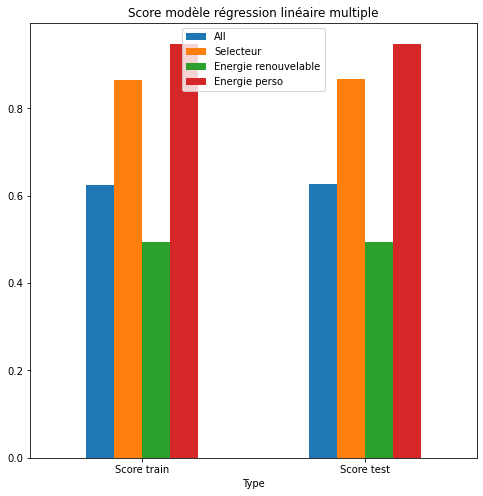

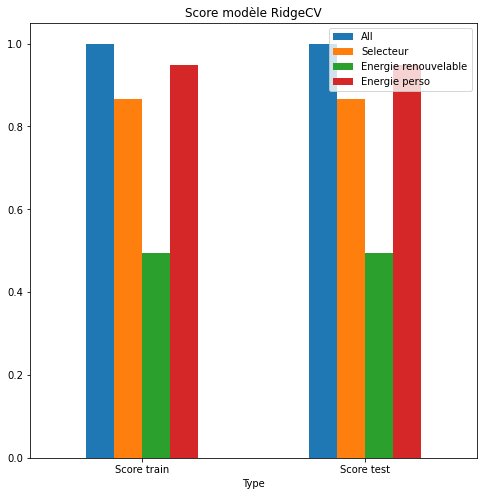

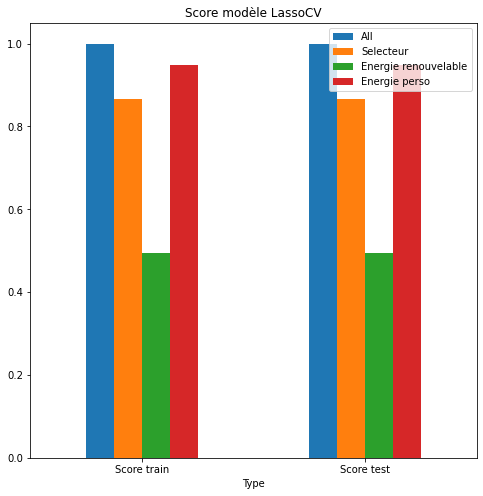

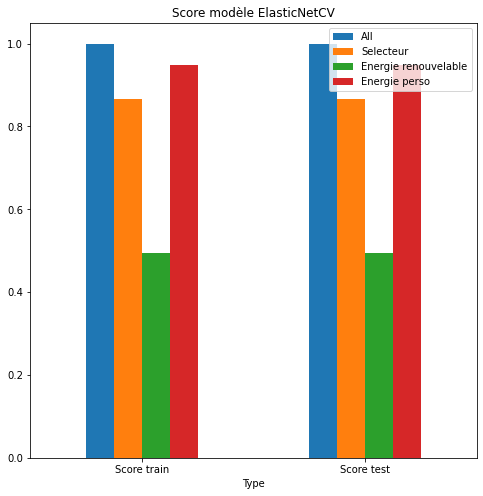

In [48]:
df_rlm.plot.bar(figsize=(8,8), title='Score modèle régression linéaire multiple', rot=0);
df_rid.plot.bar(figsize=(8,8), title='Score modèle RidgeCV', rot=0);
df_las.plot.bar(figsize=(8,8), title='Score modèle LassoCV', rot=0);
df_elne.plot.bar(figsize=(8,8), title='Score modèle ElasticNetCV', rot=0);

### Graphiques des scores

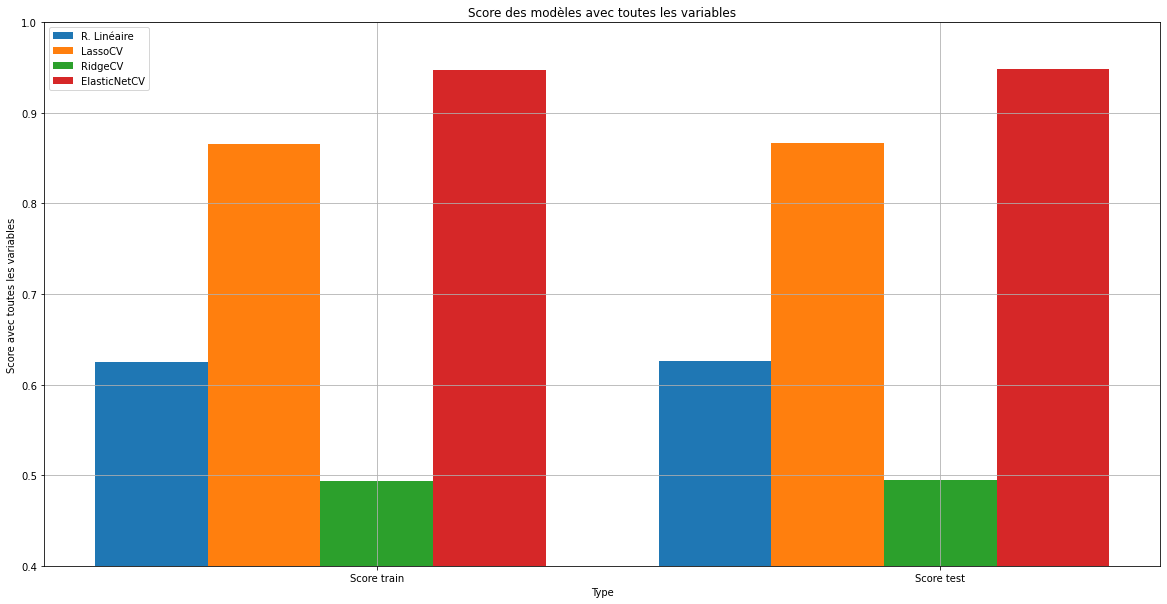

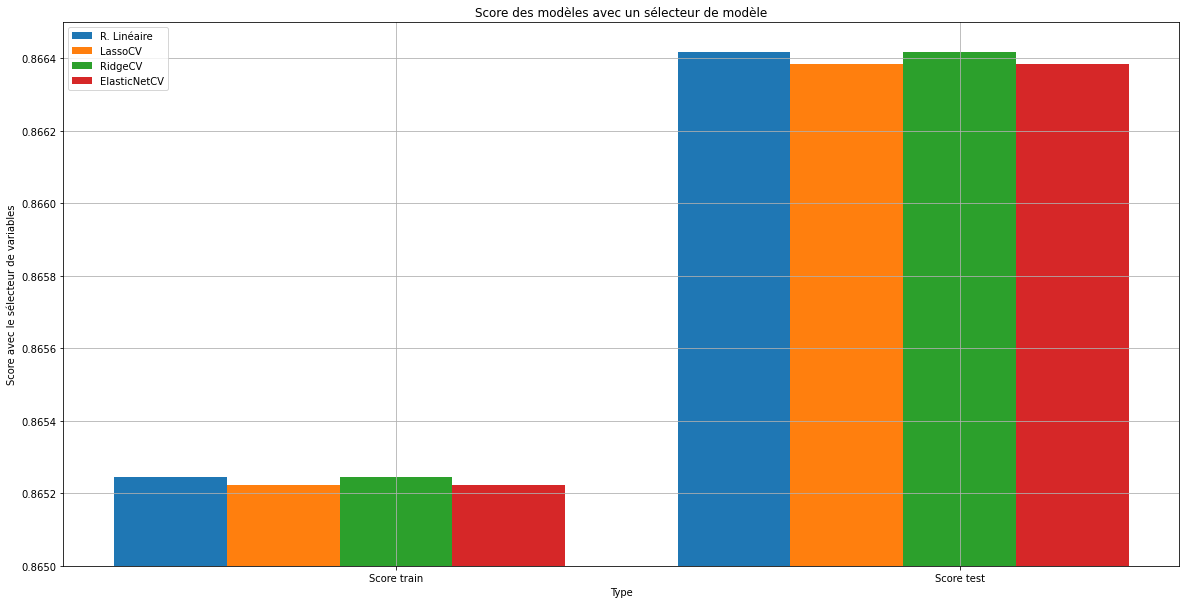

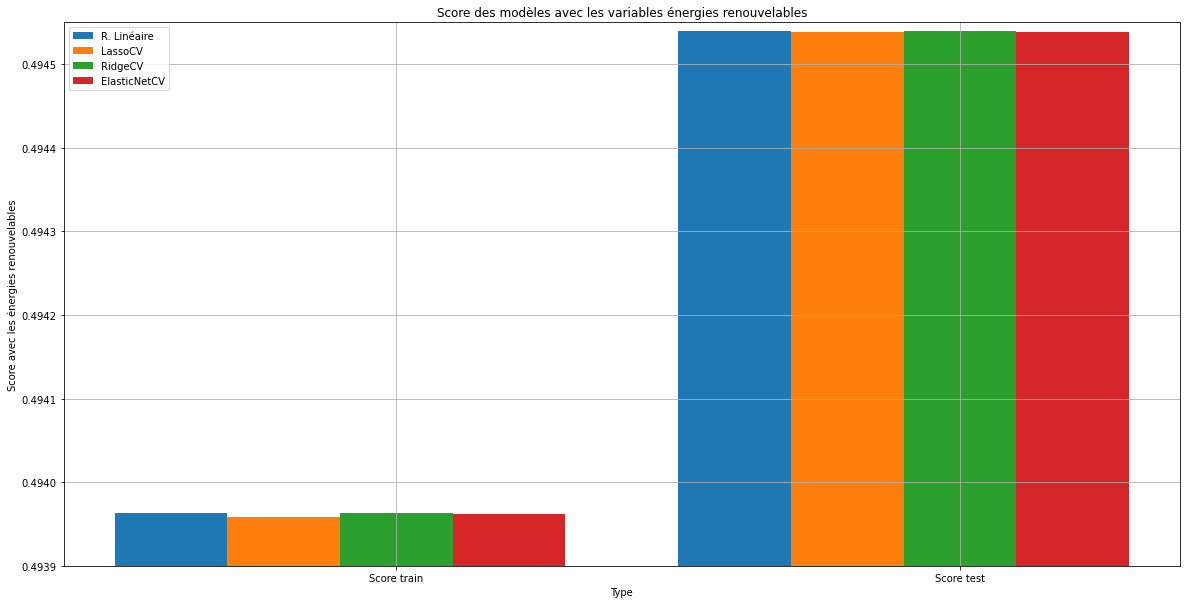

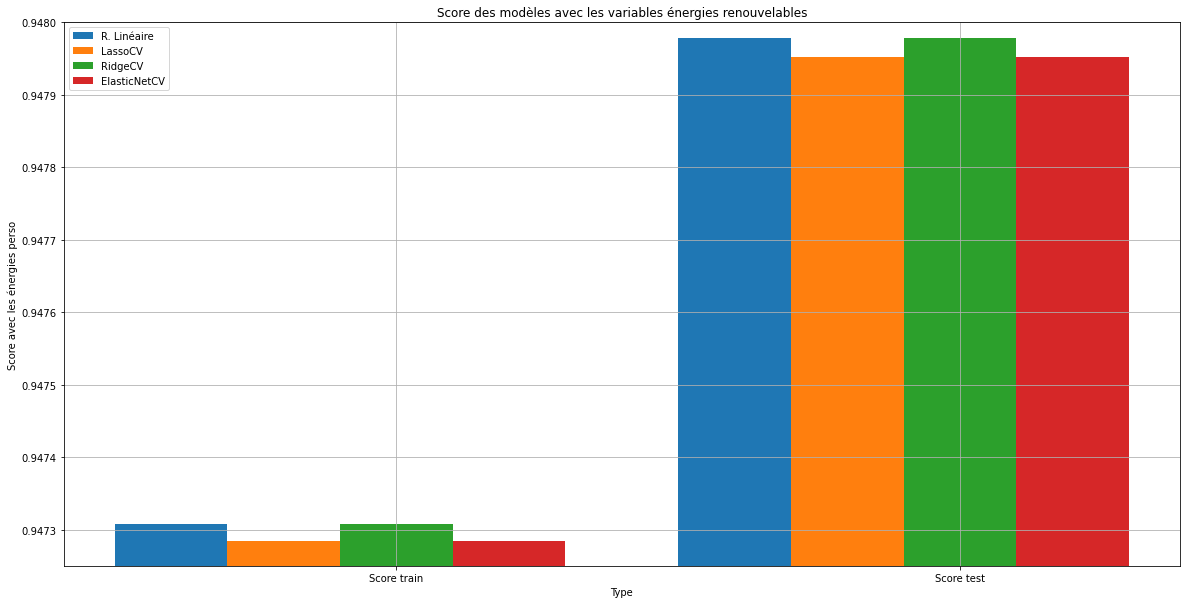

In [49]:
plt.figure(figsize=(20,10))

#df_sm.drop(['RMSE train', 'RMSE test'], axis=0, inplace=True)

Ind = np.arange(len(df_sm.index))
Rl = df_sm['R. Linéaire']
Lasso = df_sm['LassoCV']
Ridge = df_sm['RidgeCV']
En = df_sm['ElasticNetCV']

plt.xticks(Ind, df_sm.index)
axes = plt.gca()
axes.set_ylim(0.4, 1)
plt.bar(Ind-0.4, df_sm['R. Linéaire'], width=0.2, label ="R. Linéaire")
plt.bar(Ind-0.2, df_am['R. Linéaire'], width=0.2, label="LassoCV")
plt.bar(Ind, df_er['R. Linéaire'], width=0.2, label ="RidgeCV")
plt.bar(Ind+0.2, df_ep['R. Linéaire'], width=0.2, label ="ElasticNetCV")
plt.title('Score des modèles avec toutes les variables')
plt.legend()
plt.grid()
plt.xlabel('Type')
plt.ylabel('Score avec toutes les variables');



plt.figure(figsize=(20,10))

#df_am.drop(['RMSE train', 'RMSE test'], axis=0, inplace=True)

Ind = np.arange(len(df_am.index))
Rl = df_am['R. Linéaire']
Lasso = df_am['LassoCV']
Ridge = df_am['RidgeCV']
En = df_am['ElasticNetCV']

plt.xticks(Ind, df_am.index)
axes = plt.gca()
axes.set_ylim(0.865, 0.86650)
plt.bar(Ind-0.4, Rl, width=0.2, label ="R. Linéaire")
plt.bar(Ind-0.2, Lasso, width=0.2, label="LassoCV")
plt.bar(Ind, Ridge, width=0.2, label ="RidgeCV")
plt.bar(Ind+0.2, En, width=0.2, label ="ElasticNetCV")
plt.title('Score des modèles avec un sélecteur de modèle')
plt.legend()
plt.grid()
plt.xlabel('Type')
plt.ylabel('Score avec le sélecteur de variables');



plt.figure(figsize=(20,10))

#df_er.drop(['RMSE train', 'RMSE test'], axis=0, inplace=True)

Ind = np.arange(len(df_er.index))
Rl = df_er['R. Linéaire']
Lasso = df_er['LassoCV']
Ridge = df_er['RidgeCV']
En = df_er['ElasticNetCV']

plt.xticks(Ind, df_er.index)
axes = plt.gca()
axes.set_ylim(0.4939, 0.49455)
plt.bar(Ind-0.4, Rl, width=0.2, label ="R. Linéaire")
plt.bar(Ind-0.2, Lasso, width=0.2, label="LassoCV")
plt.bar(Ind, Ridge, width=0.2, label ="RidgeCV")
plt.bar(Ind+0.2, En, width=0.2, label ="ElasticNetCV")
plt.title('Score des modèles avec les variables énergies renouvelables')
plt.legend()
plt.grid()
plt.xlabel('Type')
plt.ylabel('Score avec les énergies renouvelables');


plt.figure(figsize=(20,10))

#df_ep.drop(['RMSE train', 'RMSE test'], axis=0, inplace=True)

Ind = np.arange(len(df_ep.index))
Rl = df_ep['R. Linéaire']
Lasso = df_ep['LassoCV']
Ridge = df_ep['RidgeCV']
En = df_ep['ElasticNetCV']

plt.xticks(Ind, df_ep.index)
axes = plt.gca()
axes.set_ylim(0.94725, 0.948)
plt.bar(Ind-0.4, Rl, width=0.2, label ="R. Linéaire")
plt.bar(Ind-0.2, Lasso, width=0.2, label="LassoCV")
plt.bar(Ind, Ridge, width=0.2, label ="RidgeCV")
plt.bar(Ind+0.2, En, width=0.2, label ="ElasticNetCV")
plt.title('Score des modèles avec les variables énergies renouvelables')
plt.legend()
plt.grid()
plt.xlabel('Type')
plt.ylabel('Score avec les énergies perso');

## 6) Application du modèle

#### Au vu des scores, on choisit le modèle ElasticNetCV avec les variables perso

In [50]:
#Copie du dataframe pour garder le dataframe originel intact
df_reg = df.copy()

#Supprission des variables non essentielles au modèle
df_reg.drop(['Date', 'Mois', 'Jour semaine', 'Jour', 'Heure'], axis=1, inplace=True)

#On redéfinit l'index avec le nom des régions
df_reg.index = df_reg['Région']
df_reg.drop('Région', axis=1, inplace=True)

#On garde la colonne 'Année' intacte pour la suite
dfa = df_reg.drop('Année', axis=1)

scaler = StandardScaler().fit(dfa)

#Standardisation en gardant le nom des colonnes et l'index
df_stand = pd.DataFrame(scaler.transform(dfa), index=dfa.index, columns=dfa.columns)

#On récupère la colonne 'Année' pour l'intégrer dans les ensembles d'entraînement et de test
df_st = pd.concat([df_stand, df_reg['Année']], axis=1)

#On définit les ensembles d'entraînement et de test
target = df_st['Consommation (MW)']
data = df_st.drop('Consommation (MW)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=89)

#Définition du modèle
elastic = ElasticNetCV(l1_ratio=[0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99],
                       alphas=[0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0])

#Entraînement et prédiction du modèle
elastic.fit(X_train[energ_perso], y_train) 

elastic_pred_train = elastic.predict(X_train[energ_perso])
elastic_pred_test = elastic.predict(X_test[energ_perso])

#Calcul et affichage des scores
elastic_train_score = elastic.score(X_train[energ_perso], y_train)
elastic_test_score = elastic.score(X_test[energ_perso], y_test)
elastic_train_rmse = np.sqrt(mean_squared_error(y_train, elastic_pred_train))
elastic_test_rmse = np.sqrt(mean_squared_error(y_test, elastic_pred_test))

print('Les performances du modèle RidgeCV :\n',
     'Score test :', elastic_train_score, '\n',
     'Score train :', elastic_test_score, '\n',
     'RMSE train :', elastic_train_rmse, '\n',
     'RMSE test :', elastic_test_rmse)

Les performances du modèle RidgeCV :
 Score test : 0.9472843537195352 
 Score train : 0.9479520014363165 
 RMSE train : 0.22948428111091218 
 RMSE test : 0.22859480521635822


In [51]:
moy = scaler.mean_[-1]
ec = scaler.scale_[-1]

In [52]:
#On récupère les consommations réelles et prédites dans un DataFrame
df_obs = pd.DataFrame({'Conso réelle': np.round((y_test*ec)+moy), 'Conso prédite' : np.round((elastic_pred_test*ec)+moy)}, 
             index=X_test.index)

#On récupère la variable année pour un affichage par année
df_obs = pd.concat([df_obs,X_test['Année']], axis=1)
df_obs = df_obs.groupby([df_obs.index, 'Année']).sum()

       Conso réelle  Conso prédite
Année                             
2013       161578.0       173495.0
2014       145144.0       158494.0
2015       159102.0       169600.0
2016       164568.0       175083.0
2017       164010.0       173922.0
2018       161876.0       170575.0
2019       149161.0       157249.0
2020       133721.0       141474.0
2021       123100.0       126677.0


C:\Users\chate\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


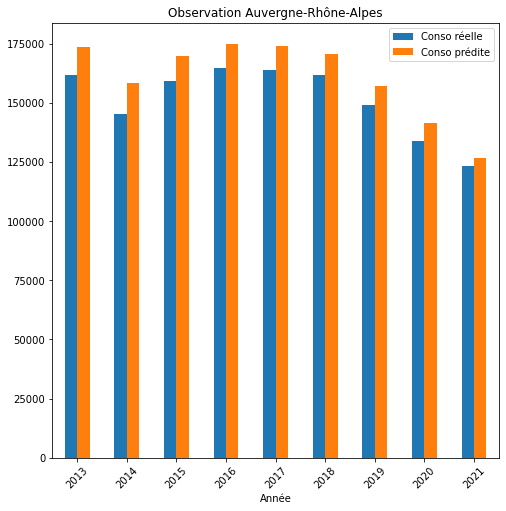

In [53]:
df_ARA = df_obs.iloc[0:9,:]
df_ARA.reset_index(inplace=True)
df_ARA.drop('Région', axis=1, inplace=True)
df_ARA.set_index('Année', inplace=True)
print(df_ARA)
df_ARA.plot.bar(figsize=(8,8), title='Observation Auvergne-Rhône-Alpes', rot=45);

       Conso réelle  Conso prédite
Année                             
2013        31911.0        20604.0
2014        40660.0        29694.0
2015        34926.0        25617.0
2016        33910.0        25193.0
2017        32658.0        25307.0
2018        35225.0        28922.0
2019        36656.0        32299.0
2020        41585.0        37746.0
2021        33323.0        30515.0


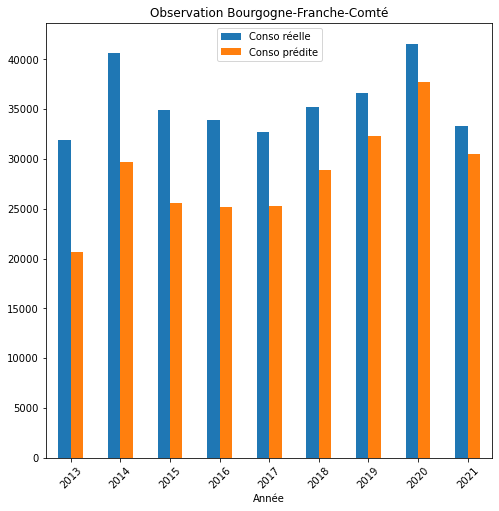

In [54]:
df_BFC = df_obs.iloc[9:18,:].abs()
df_BFC.reset_index(inplace=True)
df_BFC.drop('Région', axis=1, inplace=True)
df_BFC.set_index('Année', inplace=True)
print(df_BFC)
df_BFC.plot.bar(figsize=(8,8), title='Observation Bourgogne-Franche-Comté', rot=45);

       Conso réelle  Conso prédite
Année                             
2013        29211.0        23277.0
2014        33934.0        27972.0
2015        34503.0        29513.0
2016        30996.0        25569.0
2017        33218.0        27755.0
2018        30299.0        26302.0
2019        29993.0        26583.0
2020        33645.0        31298.0
2021        25714.0        22838.0


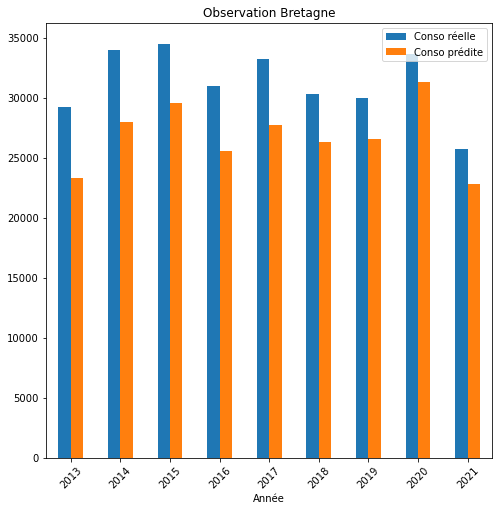

In [55]:
df_B = df_obs.iloc[18:27,:].abs()
df_B.reset_index(inplace=True)
df_B.drop('Région', axis=1, inplace=True)
df_B.set_index('Année', inplace=True)
print(df_B)
df_B.plot.bar(figsize=(8,8), title='Observation Bretagne', rot=45);

       Conso réelle  Conso prédite
Année                             
2013        42999.0        34433.0
2014        47054.0        39157.0
2015        47670.0        40716.0
2016        46962.0        40045.0
2017        46687.0        40241.0
2018        45923.0        40599.0
2019        47347.0        44320.0
2020        51665.0        50991.0
2021        41802.0        40298.0


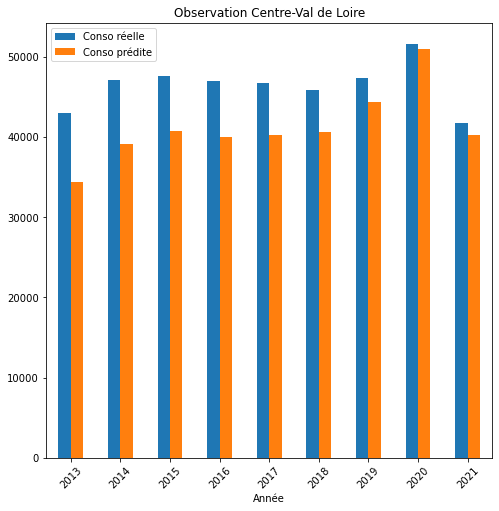

In [56]:
df_CVL = df_obs.iloc[27:36,:].abs()
df_CVL.reset_index(inplace=True)
df_CVL.drop('Région', axis=1, inplace=True)
df_CVL.set_index('Année', inplace=True)
print(df_CVL)
df_CVL.plot.bar(figsize=(8,8), title='Observation Centre-Val de Loire', rot=45);

       Conso réelle  Conso prédite
Année                             
2013        74581.0        81715.0
2014        63994.0        64478.0
2015        65256.0        62709.0
2016        73073.0        72653.0
2017        70897.0        69111.0
2018        71849.0        60093.0
2019        67798.0        51532.0
2020        54731.0        31682.0
2021        48477.0        31325.0


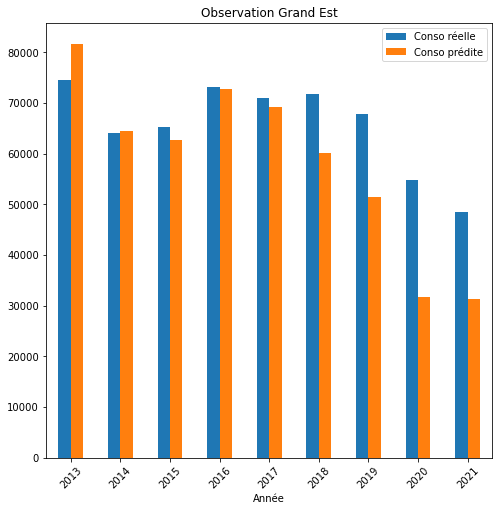

In [57]:
df_GE = df_obs.iloc[36:45,:].abs()
df_GE.reset_index(inplace=True)
df_GE.drop('Région', axis=1, inplace=True)
df_GE.set_index('Année', inplace=True)
print(df_GE)
df_GE.plot.bar(figsize=(8,8), title='Observation Grand Est', rot=45);

       Conso réelle  Conso prédite
Année                             
2013        97259.0        92606.0
2014        89335.0        81267.0
2015        91158.0        79053.0
2016        91093.0        80864.0
2017        89826.0        79482.0
2018        89823.0        71204.0
2019        86410.0        61000.0
2020        73569.0        40761.0
2021        64816.0        41024.0


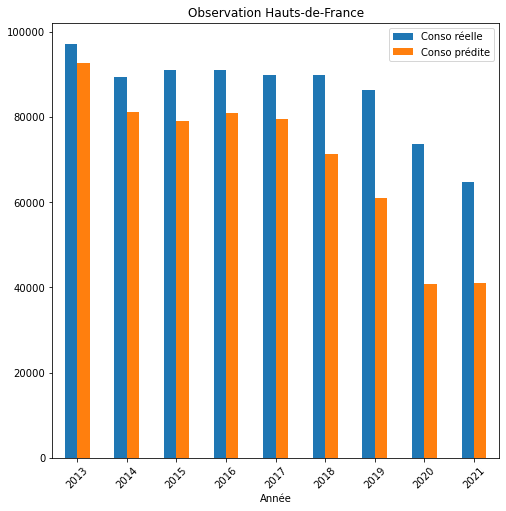

In [58]:
df_HF = df_obs.iloc[45:54,:].abs()
df_HF.reset_index(inplace=True)
df_HF.drop('Région', axis=1, inplace=True)
df_HF.set_index('Année', inplace=True)
print(df_HF)
df_HF.plot.bar(figsize=(8,8), title='Observation Hauts-de-France', rot=45);

       Conso réelle  Conso prédite
Année                             
2013         1550.0        14554.0
2014        11380.0          794.0
2015         6270.0         3524.0
2016         5102.0         6159.0
2017         7700.0         2945.0
2018         6878.0         1651.0
2019         8686.0         2181.0
2020        15083.0        10006.0
2021        11864.0         6399.0


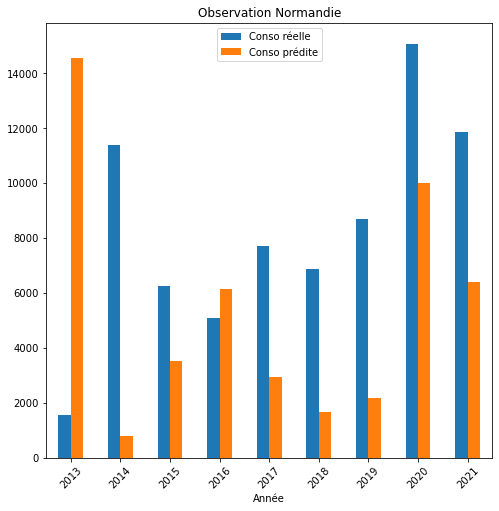

In [59]:
df_N = df_obs.iloc[54:63,:].abs()
df_N.reset_index(inplace=True)
df_N.drop('Région', axis=1, inplace=True)
df_N.set_index('Année', inplace=True)
print(df_N)
df_N.plot.bar(figsize=(8,8), title='Observation Normandie', rot=45);

       Conso réelle  Conso prédite
Année                             
2013        63264.0        61297.0
2014        52913.0        49319.0
2015        58977.0        51280.0
2016        59313.0        50036.0
2017        60401.0        48723.0
2018        59021.0        42980.0
2019        57408.0        39799.0
2020        51610.0        31398.0
2021        42014.0        22909.0


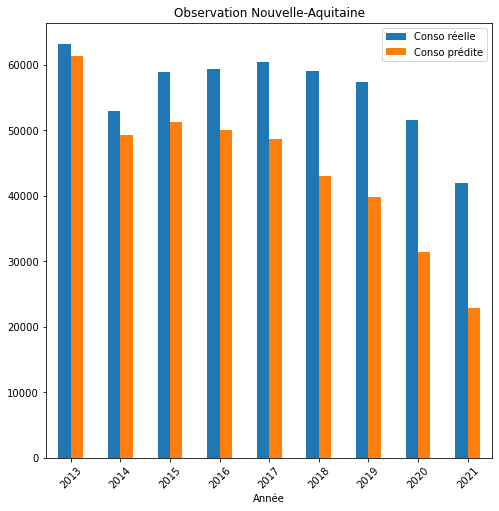

In [60]:
df_NA = df_obs.iloc[63:72,:].abs()
df_NA.reset_index(inplace=True)
df_NA.drop('Région', axis=1, inplace=True)
df_NA.set_index('Année', inplace=True)
print(df_NA)
df_NA.plot.bar(figsize=(8,8), title='Observation Nouvelle-Aquitaine', rot=45);

       Conso réelle  Conso prédite
Année                             
2013        33312.0        36730.0
2014        23125.0        25726.0
2015        27835.0        25973.0
2016        31807.0        27490.0
2017        36510.0        30222.0
2018        36527.0        30631.0
2019        34469.0        22385.0
2020        27661.0        16076.0
2021        22479.0        10829.0


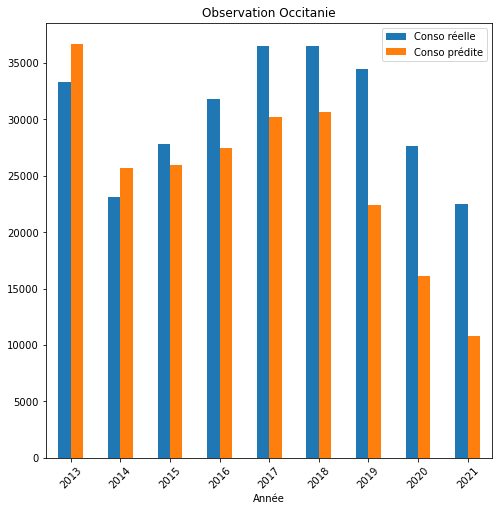

In [61]:
df_O = df_obs.iloc[72:81,:].abs()
df_O.reset_index(inplace=True)
df_O.drop('Région', axis=1, inplace=True)
df_O.set_index('Année', inplace=True)
print(df_O)
df_O.plot.bar(figsize=(8,8), title='Observation Occitanie', rot=45);

       Conso réelle  Conso prédite
Année                             
2013         7849.0         3176.0
2014        14941.0         6801.0
2015        13386.0         5960.0
2016        10311.0         3127.0
2017        10910.0         1488.0
2018         9759.0         4119.0
2019        11016.0         8081.0
2020        15853.0        14891.0
2021        14462.0        12267.0


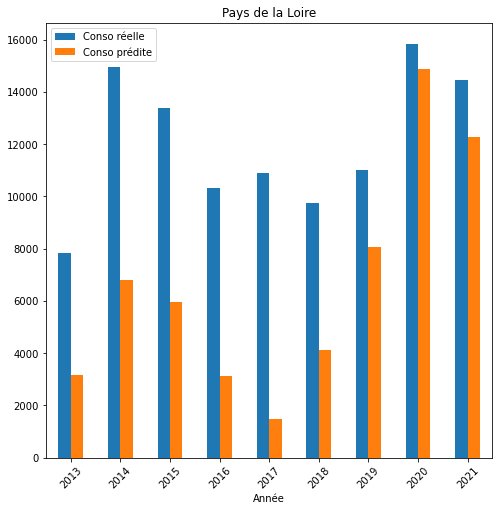

In [62]:
df_PL = df_obs.iloc[81:90,:].abs()
df_PL.reset_index(inplace=True)
df_PL.drop('Région', axis=1, inplace=True)
df_PL.set_index('Année', inplace=True)
print(df_PL)
df_PL.plot.bar(figsize=(8,8), title='Pays de la Loire', rot=45);

       Conso réelle  Conso prédite
Année                             
2013        55640.0        62610.0
2014        48562.0        53016.0
2015        50724.0        56313.0
2016        46331.0        53463.0
2017        48915.0        55253.0
2018        45738.0        48308.0
2019        46398.0        50166.0
2020        38785.0        42986.0
2021        34106.0        33795.0


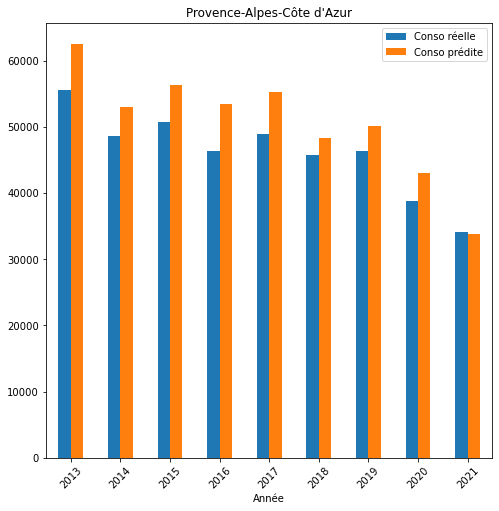

In [63]:
df_PACA = df_obs.iloc[90:99,:].abs()
df_PACA.reset_index(inplace=True)
df_PACA.drop('Région', axis=1, inplace=True)
df_PACA.set_index('Année', inplace=True)
print(df_PACA)
df_PACA.plot.bar(figsize=(8,8), title="Provence-Alpes-Côte d'Azur", rot=45);

       Conso réelle  Conso prédite
Année                             
2013       200080.0       196311.0
2014       166396.0       161941.0
2015       173966.0       170008.0
2016       182968.0       177729.0
2017       178696.0       173590.0
2018       176315.0       170508.0
2019       169323.0       163912.0
2020       147065.0       142880.0
2021       127079.0       122811.0


C:\Users\chate\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


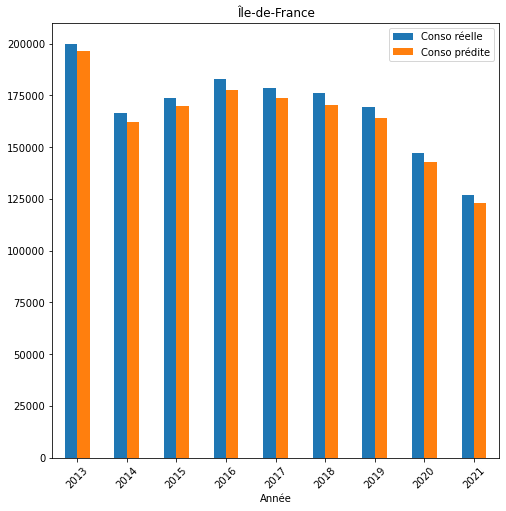

In [64]:
df_IF = df_obs.iloc[99:,:]
df_IF.reset_index(inplace=True)
df_IF.drop('Région', axis=1, inplace=True)
df_IF.set_index('Année', inplace=True)
print(df_IF)
df_IF.plot.bar(figsize=(8,8), title="Île-de-France", rot=45);